# Market Trends-Based Investment Strategy: Analyzing Opportunities Across Various Sectors

# Project Overview

- **Purpose**: This analysis focuses on identifying high-potential investment opportunities in the real estate market through data-driven insights. The project utilizes historical property sales data to assess trends in property values, sales volumes, and the best months for investment. Key methodologies include:

    - **Trend Analysis**: Identifying long-term growth through Compound Annual Growth Rate (CAGR) to highlight towns with the strongest price appreciation.

    - **Seasonality Insights**: Analyzing monthly sales data to determine the best periods for investment based on price trends and sales volumes.

    - **Investment Scoring**: Combining price, sales volume, and market opportunity metrics into a comprehensive investment score to rank towns and months for investment potential.

    - The analysis identifies the top 10 towns with the highest CAGR, indicating the best long-term investment opportunities, and highlights the best months for real estate transactions, driven by high sales volume and favorable pricing.

- **Dataset Preview**: The dataset consists of historical property sale records, detailing various attributes for each property transaction. Key columns include:

    - **Serial Number**: Unique identifier for each record.

    - **List Year**: Year the property was listed.

    - **Date Recorded**: Date of the transaction.

    - **Town**: Location of the property.

    - **Address**: Property address.

    - **Assessed Value**: Property's estimated value.

    - **Sale Amount**: Final sale price.

    - **Sales Ratio**: Ratio of the sale amount to the assessed value. Ratio at or near 1 means the assessed value and sale amount were very similar. 

    - **Property Type**: Type of property (e.g., residential, commercial).

    - **Residential Type**: Specific type of residential property (e.g., house, apartment).

This dataset allows for analyzing long-term trends, seasonal patterns, and investment potential in different towns and property types.

# Loading Data

In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# apply matplotlib styling
plt.style.use('ggplot')

# disabling scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [5]:
# load data into dataframe
df = pd.read_csv("C:/Users/amont/Downloads/CT_real_estate_data.csv", low_memory = False)
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,220810,2022,8/2/2023,Greenwich,INDIAN FIELD ROAD 0499 & 0 & I,30927330,138830000,0,Residential,Single Family
1,60428,2006,3/6/2007,Greenwich,100 W PUTNAM AVE,69421380,136700000,1,Not Listed,Not Listed
2,170888,2017,8/8/2018,Hamden,0 HAMDEN HILLS DR,55931890,136500000,0,Not Listed,Not Listed
3,13371,2013,12/16/2013,Stamford,101 WASHINGTON BOULEVARD,76228710,135000000,1,Not Listed,Not Listed
4,2100880,2021,2/3/2022,Stamford,75 TRESSER BOULEVARD,79264280,131250000,1,Apartments,Not Listed
5,130407,2013,6/27/2014,Westport,60 NYALA FARMS RD,78206200,130000000,1,Not Listed,Not Listed
6,180120,2018,11/26/2018,Greenwich,100 WEST PUTNAM AVE,90343120,130000000,1,Not Listed,Not Listed
7,160093,2016,11/7/2016,Greenwich,51 WEAVER ST,103207510,130000000,1,Not Listed,Not Listed
8,13056,2013,10/10/2013,Stamford,429 WASHINGTON BOULEVARD,67984780,128430385,1,Not Listed,Not Listed
9,70656,2007,7/28/2008,Hamden,0 HAMDEN HILLS DR,56816760,124000000,0,Not Listed,Not Listed


# Data Cleaning/Transformation

In [8]:
# viewing column names

df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type'],
      dtype='object')

In [10]:
# standardizing column names to include lowercase and underscores

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['serial_number', 'list_year', 'date_recorded', 'town', 'address',
       'assessed_value', 'sale_amount', 'sales_ratio', 'property_type',
       'residential_type'],
      dtype='object')

In [12]:
# showing scope of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048550 entries, 0 to 1048549
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   serial_number     1046644 non-null  float64
 1   list_year         1046644 non-null  float64
 2   date_recorded     1046644 non-null  object 
 3   town              1046644 non-null  object 
 4   address           1046621 non-null  object 
 5   assessed_value    1039833 non-null  float64
 6   sale_amount       1046644 non-null  float64
 7   sales_ratio       1046644 non-null  float64
 8   property_type     1046644 non-null  object 
 9   residential_type  1046644 non-null  object 
dtypes: float64(5), object(5)
memory usage: 80.0+ MB


In [14]:
# checking for missing values

print(df.isna().sum())

serial_number       1906
list_year           1906
date_recorded       1906
town                1906
address             1929
assessed_value      8717
sale_amount         1906
sales_ratio         1906
property_type       1906
residential_type    1906
dtype: int64


In [16]:
# dropping all missing values for effective datatype conversion

df = df.dropna(how = 'all')
print(df.isna().sum())

serial_number          0
list_year              0
date_recorded          0
town                   0
address               23
assessed_value      6811
sale_amount            0
sales_ratio            0
property_type          0
residential_type       0
dtype: int64


In [18]:
# dropping missing values in remaining columns

df = df.dropna(subset = ['address', 'assessed_value'])
print(df.isna().sum())

serial_number       0
list_year           0
date_recorded       0
town                0
address             0
assessed_value      0
sale_amount         0
sales_ratio         0
property_type       0
residential_type    0
dtype: int64


In [20]:
# checking data types

df.dtypes

serial_number       float64
list_year           float64
date_recorded        object
town                 object
address              object
assessed_value      float64
sale_amount         float64
sales_ratio         float64
property_type        object
residential_type     object
dtype: object

In [22]:
# changing datatypes
df['serial_number'] = df['serial_number'].astype('int64')
df['list_year'] = df['list_year'].astype('int64')
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

df.dtypes

serial_number                int64
list_year                    int64
date_recorded       datetime64[ns]
town                        object
address                     object
assessed_value             float64
sale_amount                float64
sales_ratio                float64
property_type               object
residential_type            object
dtype: object

In [24]:
# checking for duplicated data

duplicates = df.duplicated().sum()
print(duplicates)

0


In [26]:
# checking unique towns

df['town'].unique()

array(['Greenwich', 'Hamden', 'Stamford', 'Westport', 'Danbury',
       'Windsor', 'Hartford', 'Waterbury', 'Norwalk', 'West Hartford',
       'Fairfield', 'Trumbull', 'New Haven', 'West Haven', 'Enfield',
       'Rocky Hill', 'Glastonbury', 'Manchester', 'Vernon', 'Shelton',
       'Naugatuck', 'Bloomfield', 'Groton', 'New London', 'Windsor Locks',
       'Milford', 'South Windsor', 'Cromwell', 'North Haven', 'Killingly',
       'Simsbury', 'Somers', 'Middletown', 'Bridgeport', 'Newington',
       'Suffield', 'East Hartford', 'Ridgefield', 'Wallingford',
       'Meriden', 'Waterford', 'Bristol', 'Willington', 'Cheshire',
       'Westbrook', 'Darien', 'Wilton', 'Farmington', 'Bethel', 'Avon',
       'Stratford', 'New Britain', 'Guilford', 'Wethersfield',
       'Mansfield', 'New Canaan', 'Middlebury', 'Berlin', 'Windham',
       'Beacon Falls', 'Montville', 'Ellington', 'Southbury', 'Orange',
       'Newtown', 'East Haven', 'East Windsor', 'Brookfield',
       'Torrington', 'Plainfield

In [28]:
# viewing the unknown town

filtered_df = df[df['town'] == '***Unknown***']
print(filtered_df)

        serial_number  list_year date_recorded           town  \
405850          70086       2007    2007-12-18  ***Unknown***   

                address  assessed_value  sale_amount  sales_ratio  \
405850  18 MATHIEU LANE           66540       282450            0   

        property_type residential_type  
405850  Single Family    Single Family  


In [30]:
# update the address's town using Google

df['town'] = df['town'].replace('***Unknown***', 'East Hampton')
df['town'].unique()

array(['Greenwich', 'Hamden', 'Stamford', 'Westport', 'Danbury',
       'Windsor', 'Hartford', 'Waterbury', 'Norwalk', 'West Hartford',
       'Fairfield', 'Trumbull', 'New Haven', 'West Haven', 'Enfield',
       'Rocky Hill', 'Glastonbury', 'Manchester', 'Vernon', 'Shelton',
       'Naugatuck', 'Bloomfield', 'Groton', 'New London', 'Windsor Locks',
       'Milford', 'South Windsor', 'Cromwell', 'North Haven', 'Killingly',
       'Simsbury', 'Somers', 'Middletown', 'Bridgeport', 'Newington',
       'Suffield', 'East Hartford', 'Ridgefield', 'Wallingford',
       'Meriden', 'Waterford', 'Bristol', 'Willington', 'Cheshire',
       'Westbrook', 'Darien', 'Wilton', 'Farmington', 'Bethel', 'Avon',
       'Stratford', 'New Britain', 'Guilford', 'Wethersfield',
       'Mansfield', 'New Canaan', 'Middlebury', 'Berlin', 'Windham',
       'Beacon Falls', 'Montville', 'Ellington', 'Southbury', 'Orange',
       'Newtown', 'East Haven', 'East Windsor', 'Brookfield',
       'Torrington', 'Plainfield

In [32]:
# scope of numerical columns

df.describe()

,serial_number,list_year,date_recorded,assessed_value,sale_amount,sales_ratio
count,1039818,1039818,1039818,1039818,1039818,1039818
mean,513967,2011,2012-03-02 11:19:18.772785408,281571,394940,2
min,21,2001,1999-04-05 00:00:00,1,530,0
25%,30582,2004,2005-09-20 00:00:00,89390,145000,0
50%,80109,2011,2011-12-05 00:00:00,140560,232500,1
75%,160754,2017,2018-01-16 00:00:00,227780,375000,1
max,2000500023,2022,2023-09-29 00:00:00,881510000,138830000,6343
std,7480686,7,NaN,1642229,1350104,27


# Introductory Analysis

**Question 1**: What is the average sale amount trend?

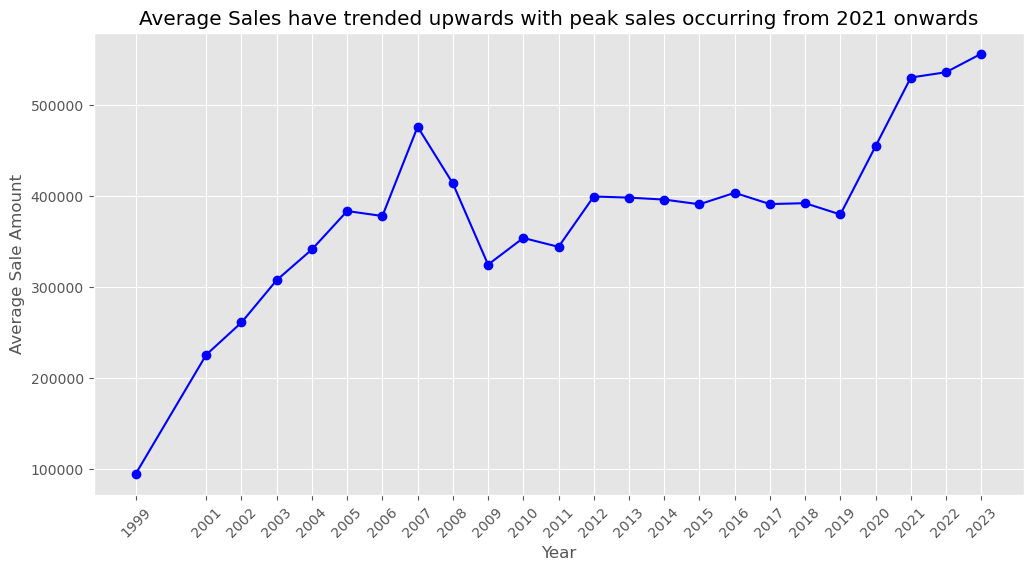

In [36]:
# extract year from date
df['Year'] = df['date_recorded'].dt.year

# group by year and calculate average sale amount
avg_sale_by_year = df.groupby("Year")['sale_amount'].mean().reset_index()

# plot trend of average sale amount over time
plt.figure(figsize = (12, 6))
plt.plot(avg_sale_by_year['Year'], avg_sale_by_year['sale_amount'], marker = 'o', color = 'b')
plt.title('Average Sales have trended upwards with peak sales occurring from 2021 onwards')
plt.xlabel('Year')
plt.ylabel('Average Sale Amount')
plt.grid(True)

# rotate x-axis labels for readability
plt.xticks(avg_sale_by_year['Year'], rotation = 45)  

plt.show()

**Question 2**: What is the median sale amount over time? 

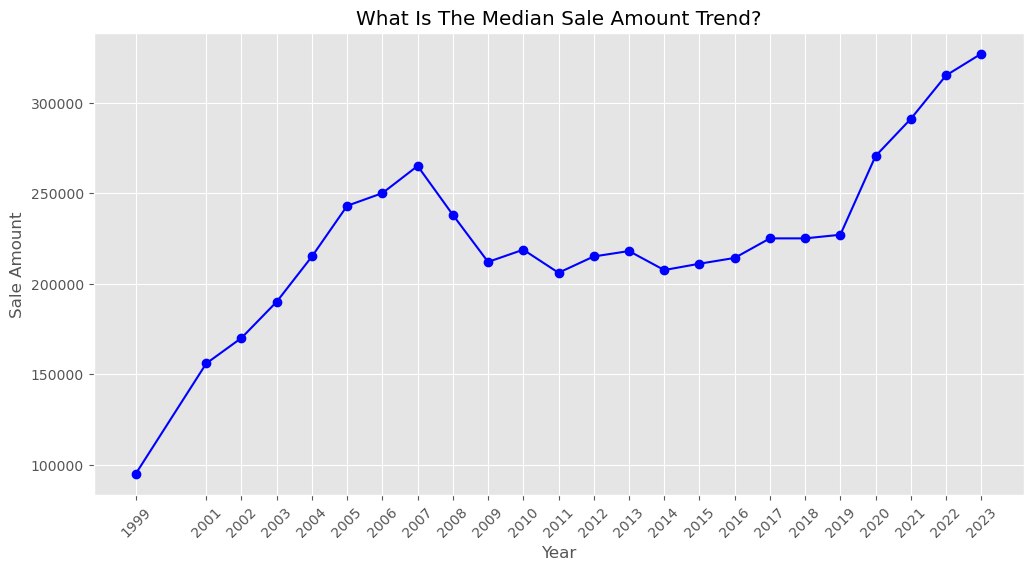

In [39]:
# extract year from date column
df['Year'] = df['date_recorded'].dt.year

# group by year, calculate median sale amount
median_prices = df.groupby('Year')['sale_amount'].median().reset_index()

# plot median price trend
plt.figure(figsize = (12, 6))
plt.plot(median_prices['Year'], median_prices['sale_amount'], marker = 'o', color = 'b')
plt.title('What Is The Median Sale Amount Trend?')
plt.xlabel('Year')
plt.ylabel('Sale Amount')
plt.grid(True)

#rotate x-axis labels for readability
plt.xticks(median_prices['Year'], rotation = 45)

# show plot
plt.show()

This analysis shows the median price over time, providing a more realistic sale amount trend as median prices are less sensitive to outliers. 

**Question 3**: How many properties were listed each year?

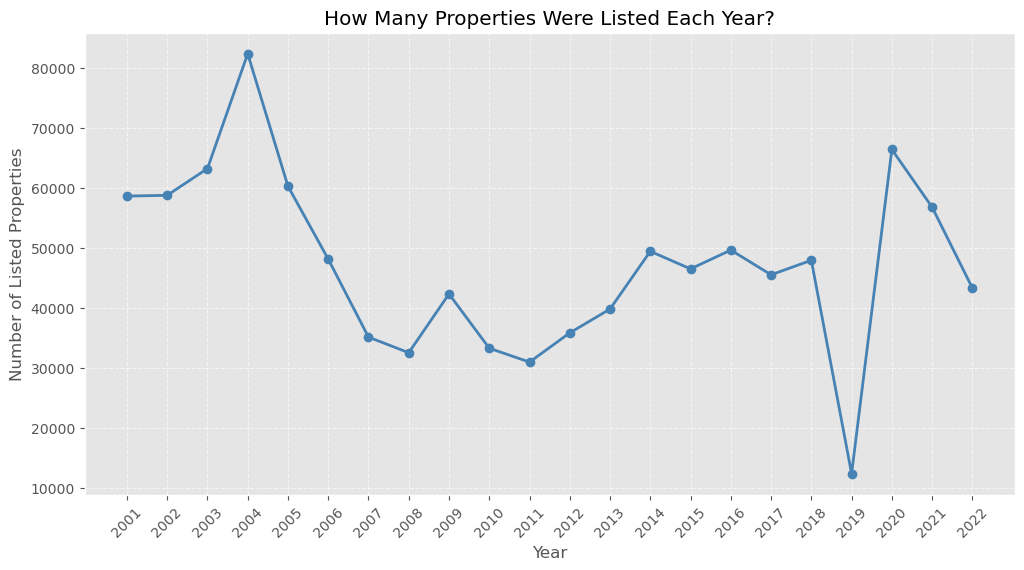

In [43]:
# ensure list_year is an integer
df['list_year'] = df['list_year'].astype(int)

# create a full range of years from min to max
all_years = pd.Series(index = range(df['list_year'].min(), df['list_year'].max() + 1), dtype = int)

# count listings per year, fill missing years with 0
year_counts = df['list_year'].value_counts().sort_index()
year_counts = all_years.add(year_counts, fill_value=0)

# plot number of listings per year
year_counts.plot(kind = 'line', figsize = (12, 6), marker = 'o', color = 'steelblue', linewidth = 2)

plt.xlabel('Year')
plt.ylabel('Number of Listed Properties')
plt.title('How Many Properties Were Listed Each Year?')

# format x-axis labels and add grid
plt.xticks(year_counts.index, rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)  # Optional: Improves readability
plt.show()

2019 had a sharp decline in properties listed, requiring a further analysis to show if it was a constant decline or a high skew from a couple of months.

**Question 4**: Which residential type is most common?

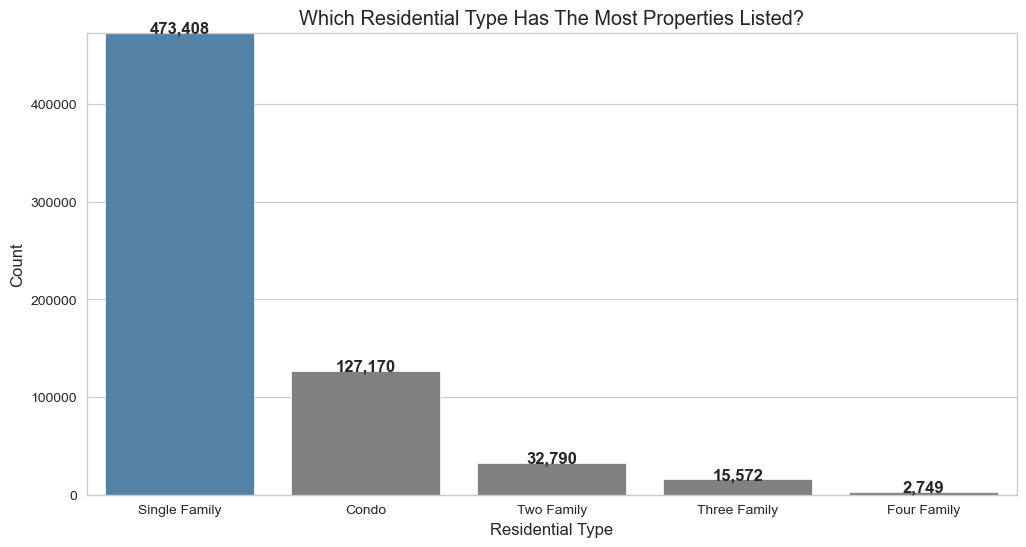

In [182]:
# count occurrences of each residential type
residential_type_count = df['residential_type'].value_counts()

# remove not listed
df = df[df["residential_type"] != "Not Listed"]

# find most common residential type
max_type = residential_type_count.idxmax()

# assign colors, highlighting the most common type
colors = ['gray' if rt != max_type else 'steelblue' for rt in residential_type_count.index]

# plot bar chart for residential types
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = residential_type_count.index, y = residential_type_count.values, palette = colors)

# annotate bars with counts
for i, value in enumerate(residential_type_count.values):
    ax.text(i, value + 0.1, f'{value:,.0f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Residential Type')
plt.ylabel('Count')
plt.title('Which Residential Type Has The Most Properties Listed?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(residential_type_count.values) + 1)

plt.show()

**Question 5**: How has the sales ratio evolved over time? (A ratio at or near 1 means the assessed value is very close or exactly equal to the sale amount)

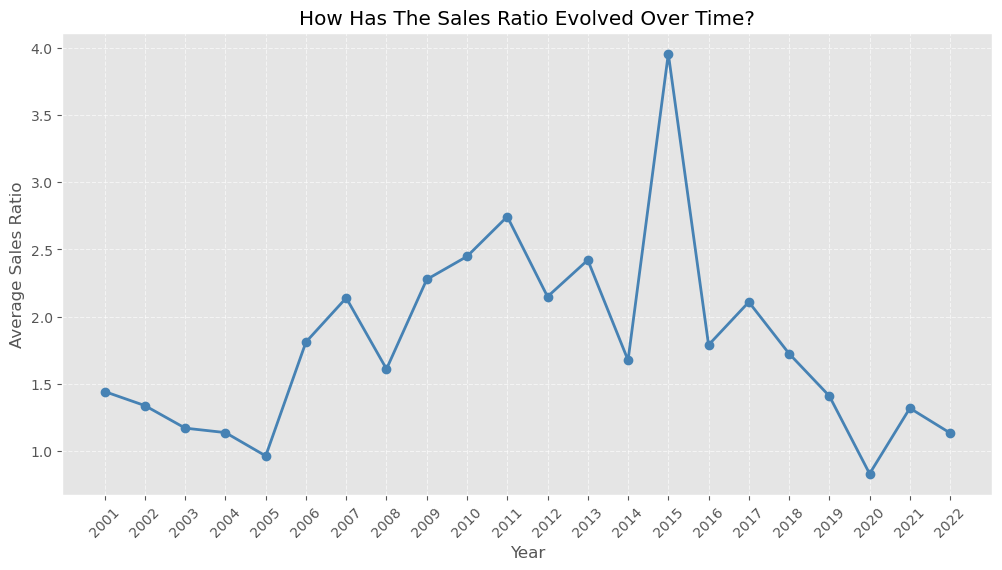

In [50]:
# ensure list_year is treated as an integer
df['list_year'] = df['list_year'].astype(int)

# calculate average sales ratio per year
sales_ratio_by_year = df.groupby('list_year')['sales_ratio'].mean()

# plot sales ratio trend over time
plt.figure(figsize = (12, 6))
plt.plot(sales_ratio_by_year.index, sales_ratio_by_year.values, marker = 'o', color = 'steelblue', linewidth = 2)

plt.xlabel('Year')
plt.ylabel('Average Sales Ratio')
plt.title('How Has The Sales Ratio Evolved Over Time?')

# show every year on x-axis with rotation
plt.xticks(sales_ratio_by_year.index, rotation = 45)

# add grid for readability
plt.grid(True, linestyle = '--', alpha = 0.6)  # Optional: Improves readability
plt.show()

Sales ratio above 1.0 means the sale amount was more than the assessed value. 2015 had a ratio of 4.0. This is a start of further explanations as to why.

**Question 6**: What are the top 5 towns by total sales volume?

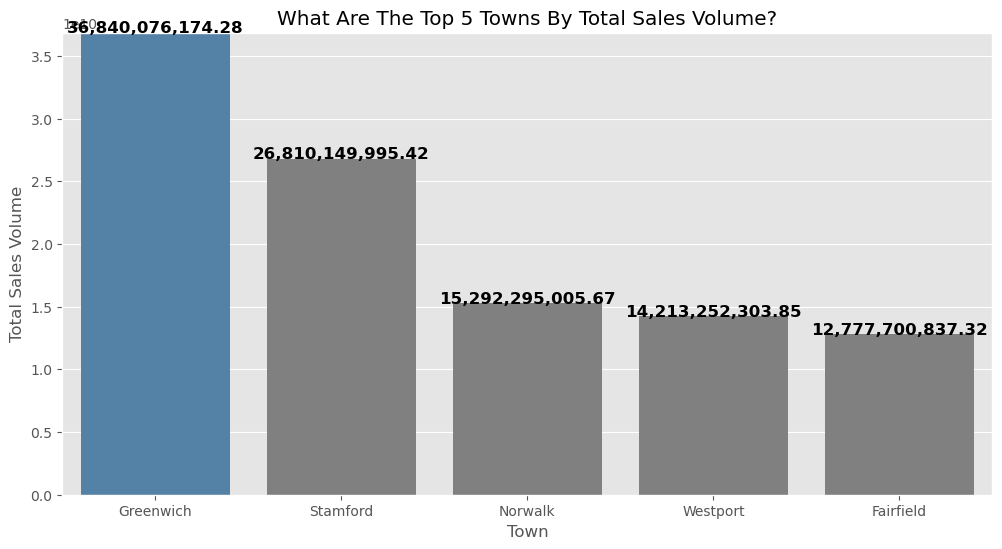

In [54]:
# calculate total sales by town and get top 5 towns
top_town_sales = df.groupby('town')['sale_amount'].sum().sort_values(ascending = False).head(5)

# find town with maximum total sales
max_town = top_town_sales.idxmax()

# assign colors, highlighting the town with max sales
colors = ['gray' if rt != max_town else 'steelblue' for rt in top_town_sales.index]

# plot top 5 towns by total sales volume
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = top_town_sales.index, y = top_town_sales.values, palette = colors)

# annotate bars with sales volume
for i, value in enumerate(top_town_sales.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Town')
plt.ylabel('Total Sales Volume')
plt.title('What Are The Top 5 Towns By Total Sales Volume?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(top_town_sales.values) + 1)

plt.show()

**Question 7**: What are the top 5 towns by average sale amount?

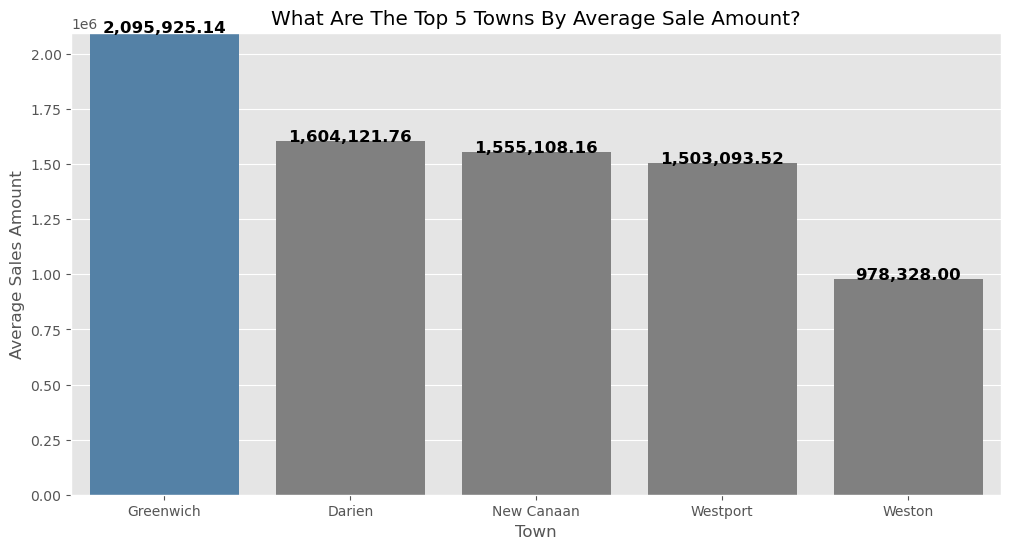

In [57]:
# calculate average sales by town and get top 5 towns
avg_sales_per_town = df.groupby('town')['sale_amount'].mean().sort_values(ascending = False).head(5)

# find town with maximum average sales
max_town = avg_sales_per_town.idxmax()

# assign colors, highlighting the town with max average sales
colors = ['steelblue' if town == max_town else 'gray' for town in avg_sales_per_town.index]

# plot top 5 towns by average sales amount
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = avg_sales_per_town.index, y = avg_sales_per_town.values, palette = colors)

# annotate bars with average sales amount
for i, value in enumerate(avg_sales_per_town.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Town')
plt.ylabel('Average Sales Amount')
plt.title('What Are The Top 5 Towns By Average Sale Amount?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(avg_sales_per_town.values) + 1)

plt.show()

**Question 8**: What are the top 5 towns by median sales amount?

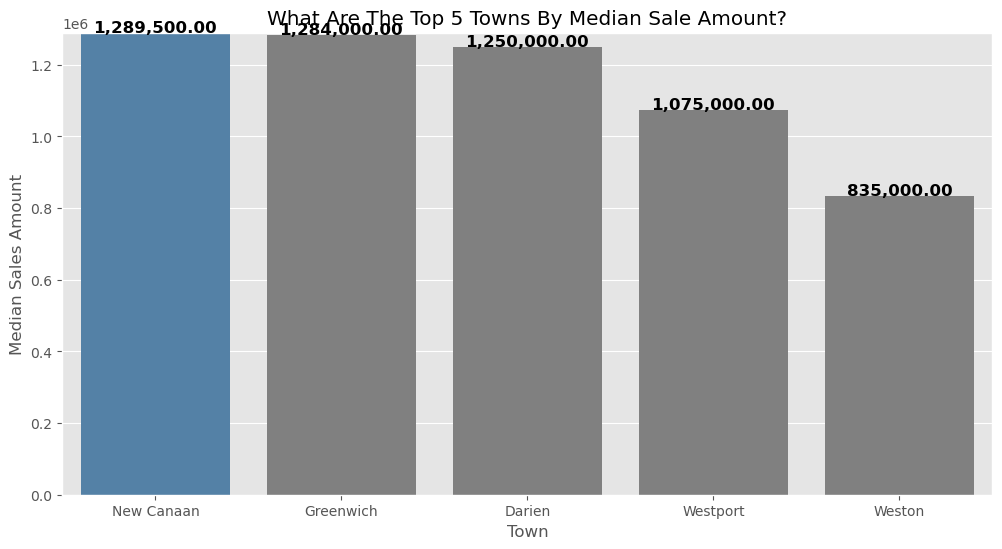

In [60]:
# calculate median sales by town and get top 5 towns
median_sales_per_town = df.groupby('town')['sale_amount'].median().sort_values(ascending = False).head(5)

# find town with maximum median sales
max_town = median_sales_per_town.idxmax()

# assign colors, highlighting the town with max median sales
colors = ['steelblue' if town == max_town else 'gray' for town in median_sales_per_town.index]

# plot top 5 towns by median sales amount
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = median_sales_per_town.index, y = median_sales_per_town.values, palette = colors)

# annotate bars with median sales amount
for i, value in enumerate(median_sales_per_town.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Town')
plt.ylabel('Median Sales Amount')
plt.title('What Are The Top 5 Towns By Median Sale Amount?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(median_sales_per_town.values) + 1)

plt.show()

**Question 9**: What are the top 5 average selling prices per property type?

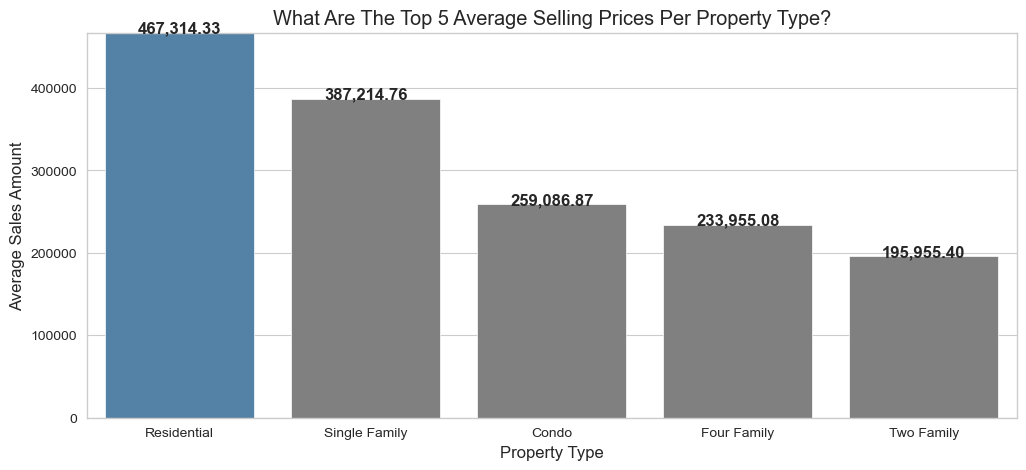

In [184]:
# calculate average sale amount per property type and get top 5
property_price_avg = df.groupby('property_type')['sale_amount'].mean().sort_values(ascending = False).head(5)

# remove not listed
df = df[df["property_type"] != "Not Listed"]

# find property type with maximum average sale amount
max_price = property_price_avg.idxmax()

# assign colors, highlighting the property type with max price
colors = ['steelblue' if property_type == max_price else 'gray' for property_type in property_price_avg.index]

# plot top 5 property types by average sales amount
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = property_price_avg.index, y = property_price_avg.values, palette = colors)

# annotate bars with average sale amount
for i, value in enumerate(property_price_avg.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Property Type')
plt.ylabel('Average Sales Amount')
plt.title('What Are The Top 5 Average Selling Prices Per Property Type?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(property_price_avg.values) + 1)

plt.show()

**Question 10**: What are the top 5 median sale amounts by property type?

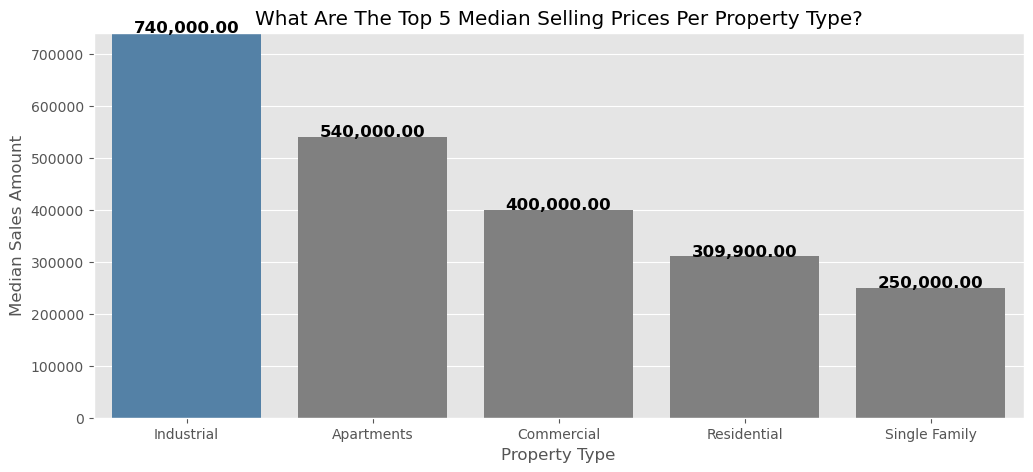

In [66]:
# calculate median sale amount per property type and get top 5
property_price_median = df.groupby('property_type')['sale_amount'].median().sort_values(ascending = False).head(5)

# find property type with maximum median sale amount
max_price = property_price_median.idxmax()

# assign colors, highlighting the property type with max price
colors = ['steelblue' if property_type == max_price else 'gray' for property_type in property_price_median.index]

# plot top 5 property types by median sales amount
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = property_price_median.index, y = property_price_median.values, palette = colors)

# annotate bars with median sale amount
for i, value in enumerate(property_price_median.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Property Type')
plt.ylabel('Median Sales Amount')
plt.title('What Are The Top 5 Median Selling Prices Per Property Type?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(property_price_median.values) + 1)

plt.show()

**Question 11**: How does the price distribution look for property types?

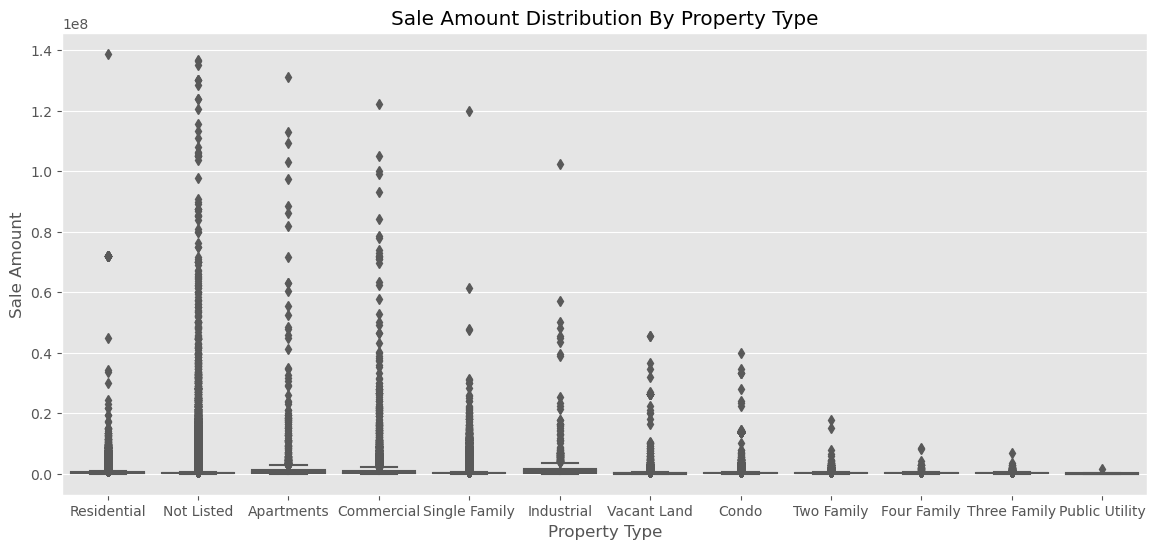

In [69]:
# plot sale amount distribution by property type using boxplot
plt.figure(figsize = (14, 6))
sns.boxplot(x = 'property_type', y = 'sale_amount', data = df, palette = 'Set2')

plt.xlabel('Property Type')
plt.ylabel('Sale Amount')
plt.title('Sale Amount Distribution By Property Type')

plt.show()

**Question 12**: How does the price distribution look for residential types?

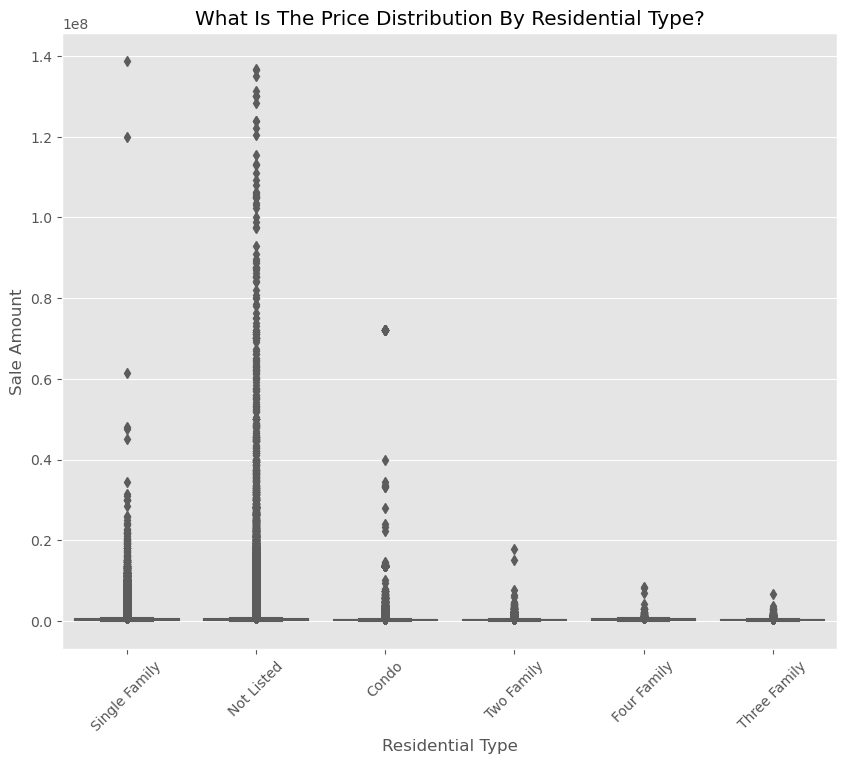

In [72]:
# plot price distribution for each residential type
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'residential_type', y = 'sale_amount', data = df, palette = "coolwarm")

# add lables & title
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.title('What Is The Price Distribution By Residential Type?')
plt.xticks(rotation = 45)

# show the plot
plt.show()

**Question 13**: Which residential type has the highest average sale amount?

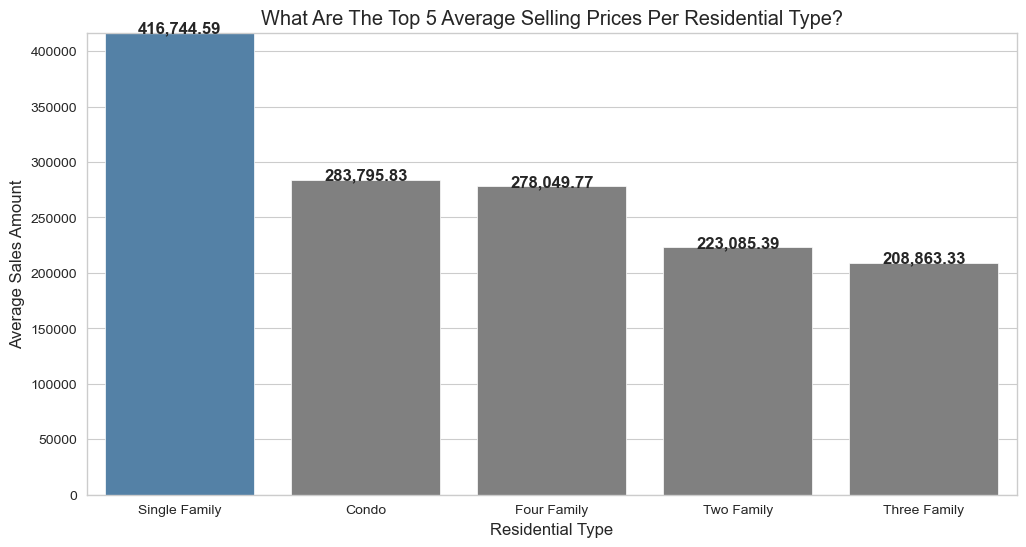

In [186]:
# calculate average sale amount per residential type and get top 5
residential_price_avg = df.groupby('residential_type')['sale_amount'].mean().sort_values(ascending = False).head(5)

# remove not listed
df = df[df['residential_type'] != 'Not Listed']

# find residential type with maximum average sale amount
max_price = residential_price_avg.idxmax()

# assign colors, highlighting the residential type with max price
colors = ['steelblue' if rt == max_price else 'gray' for rt in residential_price_avg.index]

# plot top 5 residential types by average sales amount
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = residential_price_avg.index, y = residential_price_avg.values, palette = colors)

# annotate bars with average sale amount
for i, value in enumerate(residential_price_avg.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Residential Type')
plt.ylabel('Average Sales Amount')
plt.title('What Are The Top 5 Average Selling Prices Per Residential Type?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(residential_price_avg.values) + 1)

# show the plot
plt.show()

**Question 14**: What are the top 5 residential types by median sale amount?

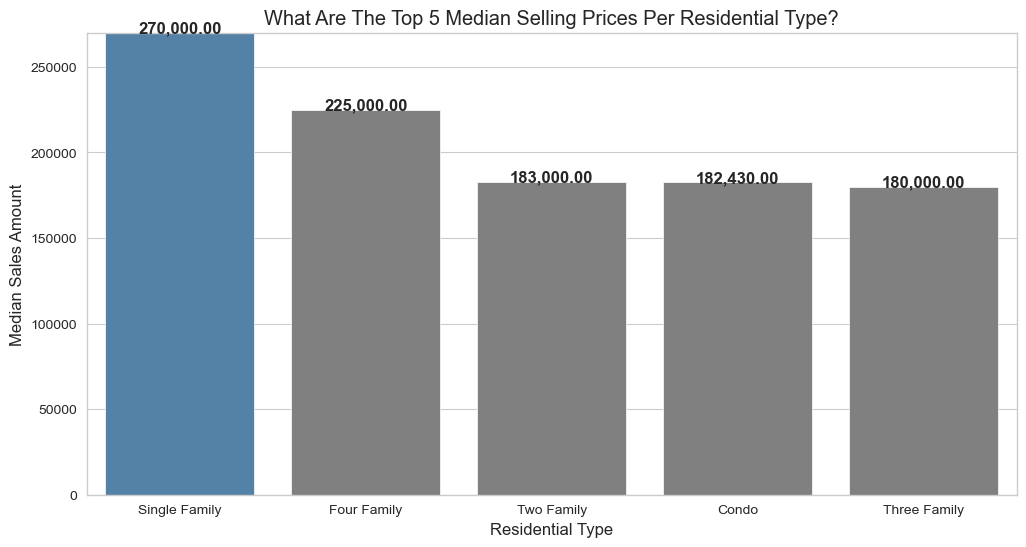

In [188]:
# calculate median sale amount per residential type and get top 5
residential_price_median = df.groupby('residential_type')['sale_amount'].median().sort_values(ascending = False).head(5)

# remove not listed
df = df[df['residential_type'] != 'Not Listed']

# find residential type with maximum median sale amount
max_price = residential_price_median.idxmax()

# assign colors, highlighting the residential type with max price
colors = ['steelblue' if rt == max_price else 'gray' for rt in residential_price_median.index]

# plot top 5 residential types by median sales amount
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = residential_price_median.index, y = residential_price_median.values, palette = colors)

# annotate bars with median sale amount
for i, value in enumerate(residential_price_median.values):
    ax.text(i, value + 0.1, f'{value:,.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

plt.xlabel('Residential Type')
plt.ylabel('Median Sales Amount')
plt.title('What Are The Top 5 Median Selling Prices Per Residential Type?')

# adjust y-axis limit for better spacing
plt.ylim(0, max(residential_price_median.values) + 1)

# show the plot
plt.show()

**Question 15**: How does sales ratio vary across residential types?

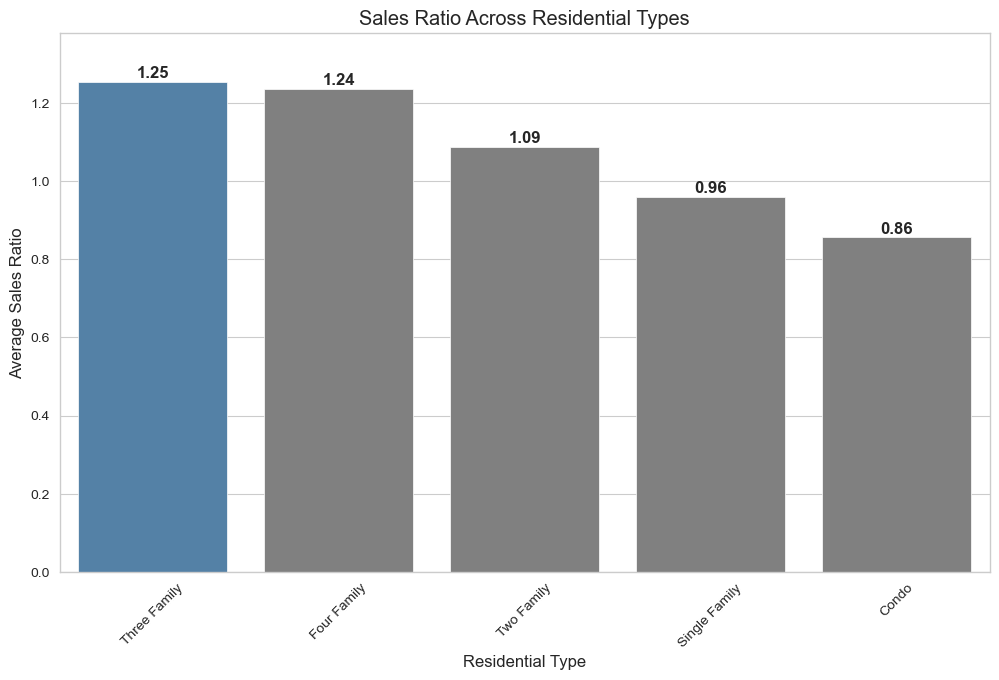

In [190]:
# calculate average sales ratio per residential type and sort in descending order
avg_sales_ratio = df.groupby('residential_type')['sales_ratio'].mean().sort_values(ascending = False)

# remove not listed
df = df[df['residential_type'] != 'Not Listed']

# assign colors, highlighting the residential type with the highest sales ratio
colors = ['steelblue' if value == max(avg_sales_ratio.values) else 'gray' for value in avg_sales_ratio.values]

# plot the average sales ratio for each residential type
plt.figure(figsize = (12, 7))
ax = sns.barplot(x = avg_sales_ratio.index, y = avg_sales_ratio.values, palette = colors)

# annotate bars with average sales ratio
for i, value in enumerate(avg_sales_ratio.values):
    ax.text(i, value + 0.01, f'{value:.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

# add labels and title
plt.xlabel('Residential Type')
plt.ylabel('Average Sales Ratio')
plt.title('Sales Ratio Across Residential Types')

# adjust x-axis labels and y-axis limit
plt.xticks(rotation = 45)
plt.ylim(0, max(avg_sales_ratio.values) * 1.1)

# show the plot
plt.show()

**Question 16**: What residential types compose the top 5 towns by number of properties?

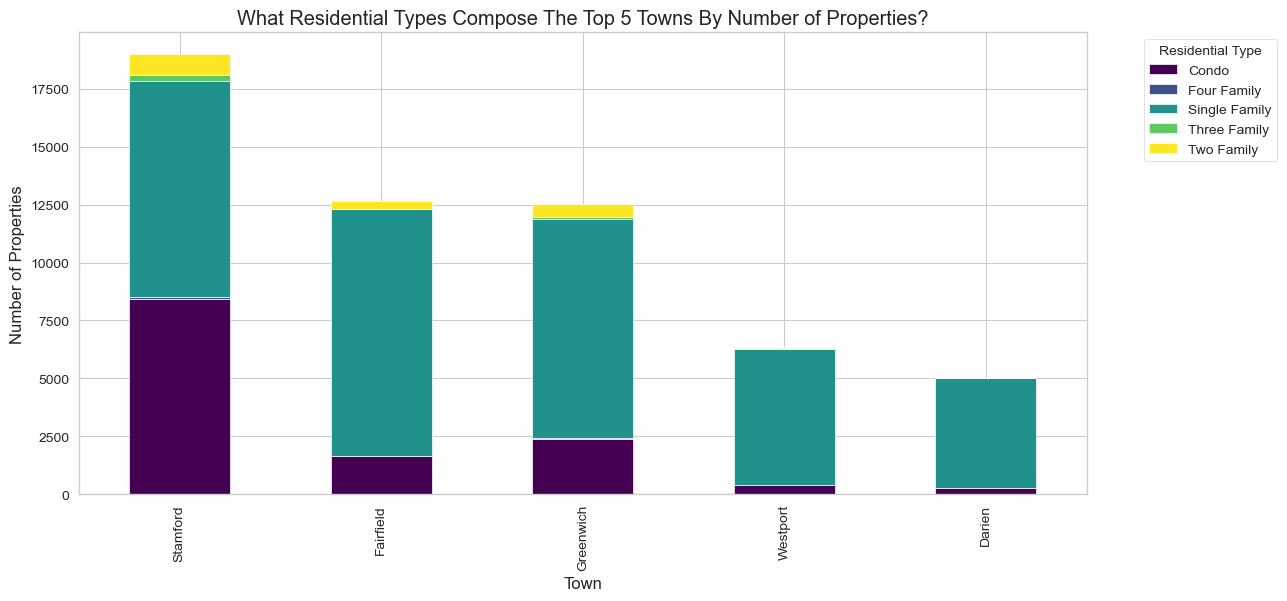

In [192]:
# get the top 5 towns by total sales volume
top_towns = df.groupby('town')['sale_amount'].sum().sort_values(ascending = False).head(5).index

# remove not listed
df = df[df['residential_type'] != 'Not Listed']

# filter data for only these towns
df_top_towns = df[df['town'].isin(top_towns)]

# count the residential type occurrences within these towns
res_type_counts = df_top_towns.groupby(['town', 'residential_type']).size().unstack().fillna(0)

# sort towns by total properties descending
res_type_counts = res_type_counts.loc[res_type_counts.sum(axis = 1).sort_values(ascending = False).index]

# plot as a stacked bar chart
res_type_counts.plot(kind = 'bar', stacked = True, figsize = (13, 6), colormap = "viridis")

# add labels & title
plt.xlabel('Town')
plt.ylabel('Number of Properties')
plt.title('What Residential Types Compose The Top 5 Towns By Number of Properties?')
plt.legend(title = 'Residential Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# show the plot
plt.show()

**Question 17**: How much of the Connecticut market does each residential type compose of?

<Figure size 1500x1000 with 0 Axes>

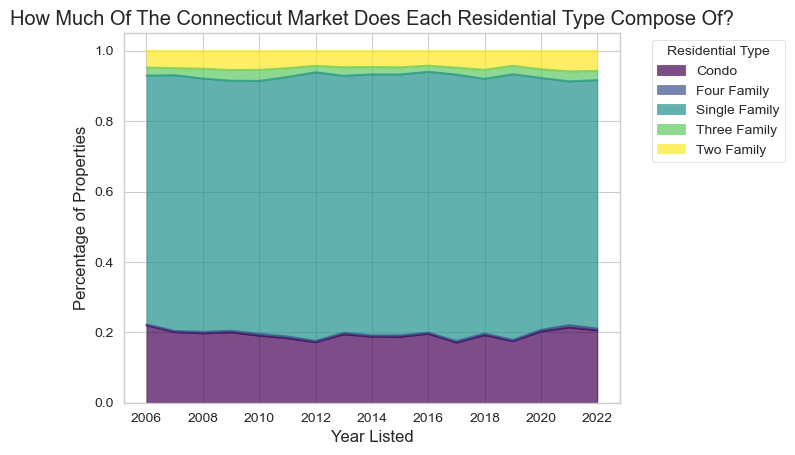

In [194]:
# count residential type occurrences per year
res_type_trends = df.groupby(['list_year', 'residential_type']).size().unstack().fillna(0)

# remove not listed
df = df[df['residential_type'] != 'Not Listed']

# normalize to get % of total sales per year
res_type_trends_pct = res_type_trends.div(res_type_trends.sum(axis = 1), axis = 0)

# plot as a stacked area chart
plt.figure(figsize = (15, 10))
res_type_trends_pct.plot(kind = 'area', stacked = True, colormap = 'viridis', alpha = 0.7)

# add labels & title
plt.xlabel('Year Listed')
plt.ylabel('Percentage of Properties')
plt.title('How Much Of The Connecticut Market Does Each Residential Type Compose Of?')
plt.legend(title = 'Residential Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# show the plot
plt.show()

**Question 18**: How much of the Connecticut market does each property type compose of?

<Figure size 1500x1000 with 0 Axes>

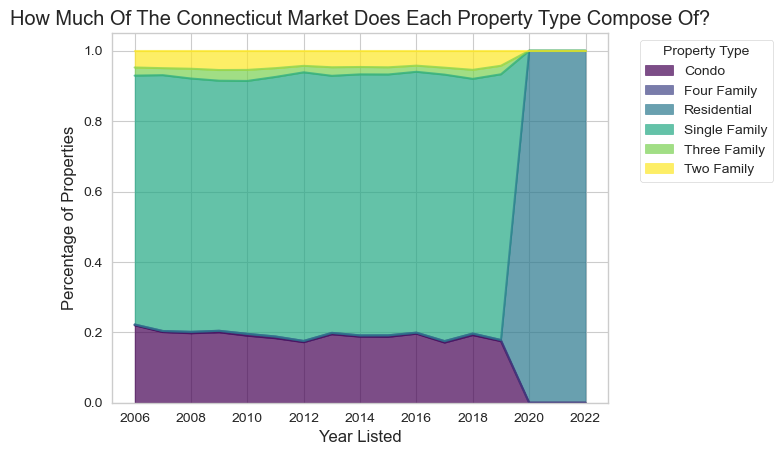

In [196]:
# count property type occurrences per year
prop_type_trends = df.groupby(['list_year', 'property_type']).size().unstack().fillna(0)

# remove not listed
df = df[df['property_type'] != 'Not Listed']

# normalize to get % of total sales per year
prop_type_trends_pct = prop_type_trends.div(prop_type_trends.sum(axis = 1), axis = 0)

# plot as a stacked area chart
plt.figure(figsize = (15, 10))
prop_type_trends_pct.plot(kind = 'area', stacked = True, colormap = 'viridis', alpha = 0.7)

# add labels & title
plt.xlabel('Year Listed')
plt.ylabel('Percentage of Properties')
plt.title('How Much Of The Connecticut Market Does Each Property Type Compose Of?')
plt.legend(title = 'Property Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# show the plot
plt.show()

**Question 19**: Is there any correlation between the numerical fields?

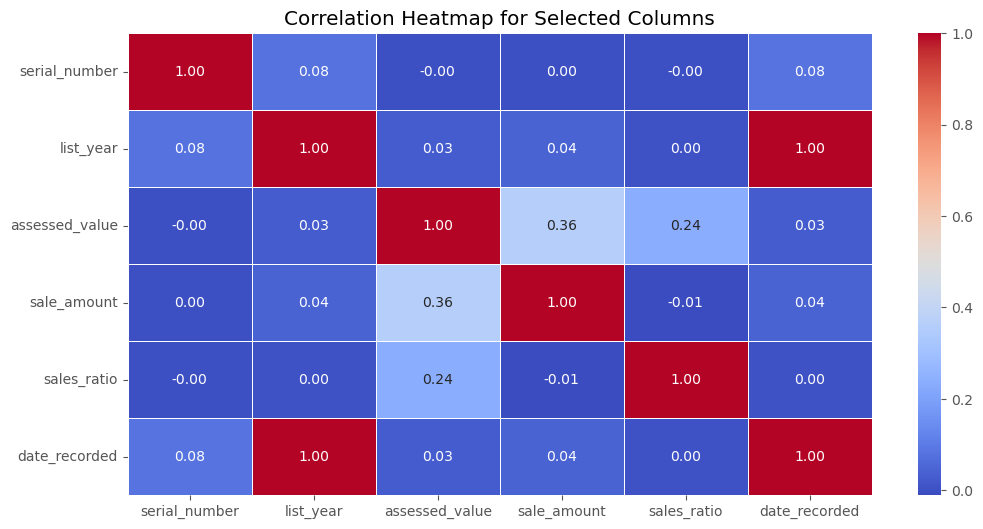

In [93]:
# select relevant columns for correlation matrix
selected_columns = ['serial_number', 'list_year', 'assessed_value', 'sale_amount', 'sales_ratio', 'date_recorded']

# calculate correlation matrix for selected columns
corr_matrix = df[selected_columns].corr()

# set up the figure size for better readability
plt.figure(figsize = (12, 6))

# create heatmap of correlation matrix
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5)

# add title to the heatmap
plt.title("Correlation Heatmap for Selected Columns")

# show the plot
plt.show()

# Advanced Analysis

**Question 1**: Which residential types have stable vs. volatile pricing?

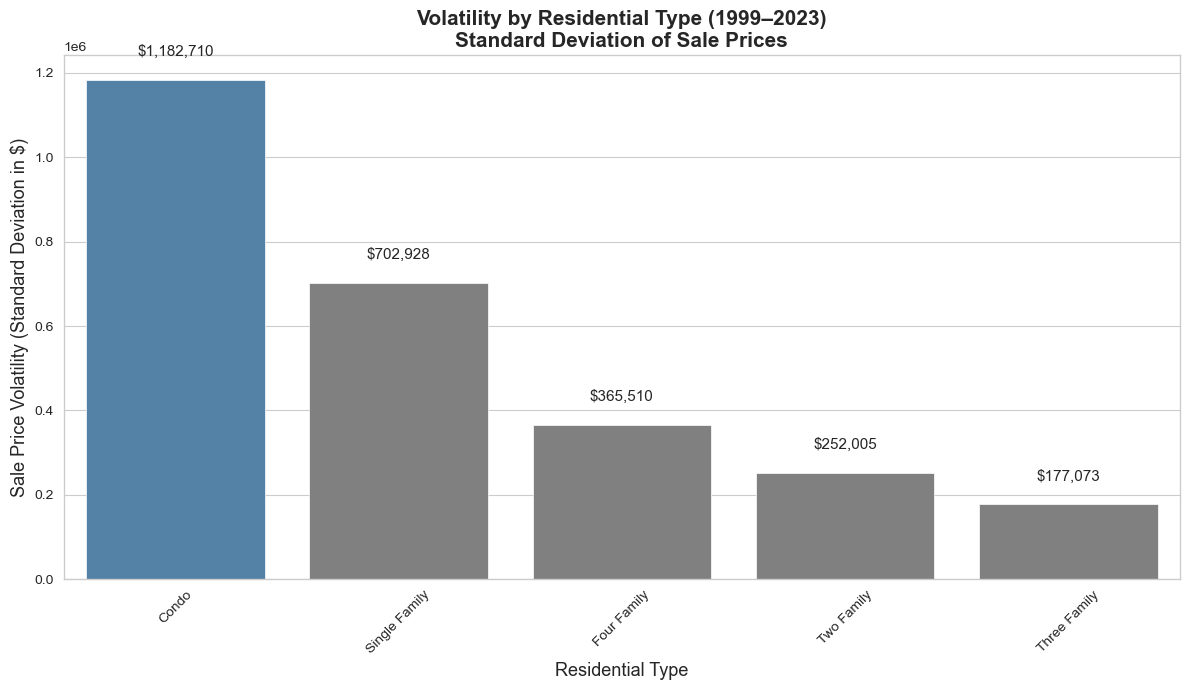

In [97]:
# calculate the standard deviation (price variability) per residential type and sort in descending order
price_variability = df.groupby('residential_type')['sale_amount'].std().sort_values(ascending = False)

# removing "Not Listed"
cleaned_price_variability = price_variability[price_variability.index != "Not Listed"]

# assign colors, highlighting the residential type with the highest price variability
highlight_type = cleaned_price_variability.idxmax()
colors = ['steelblue' if index == highlight_type else 'gray' for index in cleaned_price_variability.index]

# plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(x=cleaned_price_variability.index, y=cleaned_price_variability.values, palette=colors)

# annotate bars
for i, (label, value) in enumerate(cleaned_price_variability.items()):
    ax.text(i, value + 50000, f'${value:,.0f}', ha='center', va='bottom', fontsize=11)

# labels and title
plt.xlabel('Residential Type', fontsize=13)
plt.ylabel('Sale Price Volatility (Standard Deviation in $)', fontsize=13)
plt.title('Volatility by Residential Type (1999–2023)\nStandard Deviation of Sale Prices', fontsize=15, weight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This analysis indicates the price volatility of each residential type, which is calculated as the standard deviation of sale prices for each residential type. Besides properties that are not listed (requiring further research), condos have the highest volatility, meaning the market for them may not be as stable due to their value being determined by investor activity and demand. Three family homes are more stable markets, which can be attractive to investors. This may stem from limited availability. 

**Question 2**: What is the market volatility over time?

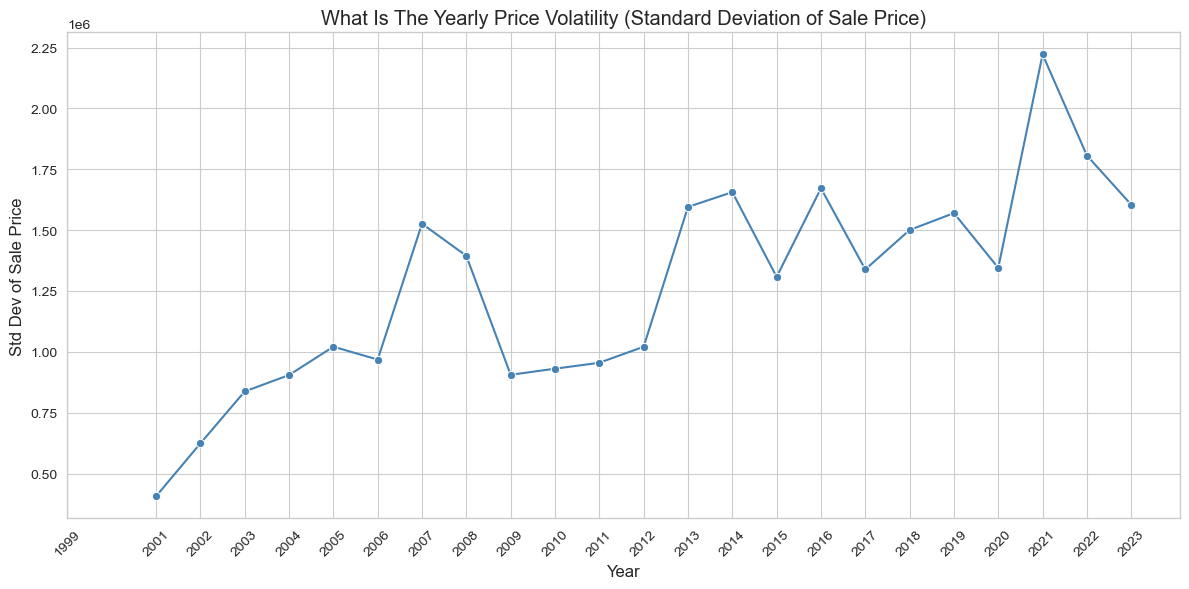

In [101]:
# ensure date is datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# extract year
df['Year'] = df['Date Recorded'].dt.year

# calculate standard deviation of sale price per year
volatility_yearly = df.groupby('Year')['sale_amount'].std().reset_index()
volatility_yearly.columns = ['Year', 'Price Volatility']

# plot
plt.figure(figsize = (12, 6))
sns.lineplot(data = volatility_yearly, x = 'Year', y = 'Price Volatility', marker = 'o', color = 'steelblue')
plt.title('What Is The Yearly Price Volatility (Standard Deviation of Sale Price)')
plt.xlabel('Year')
plt.ylabel('Std Dev of Sale Price')
plt.grid(True)

# force all years to show on x-axis
plt.xticks(ticks = volatility_yearly['Year'], rotation=45)

plt.tight_layout()
plt.show()

The graph shows the price volatility over time, with markets steadying from 2009-2012, a dramatic increase in 2013, followed by up & down trending until the largest jump in 2021. Suggestions for such a jump in 2021 can correlate with the economic shifts during the COVID pandemic. 

**Question 3**: What is the projected average sale amount?(forecasted 5 years from latest year in data)

C:\Users\amont\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amont\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amont\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amont\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

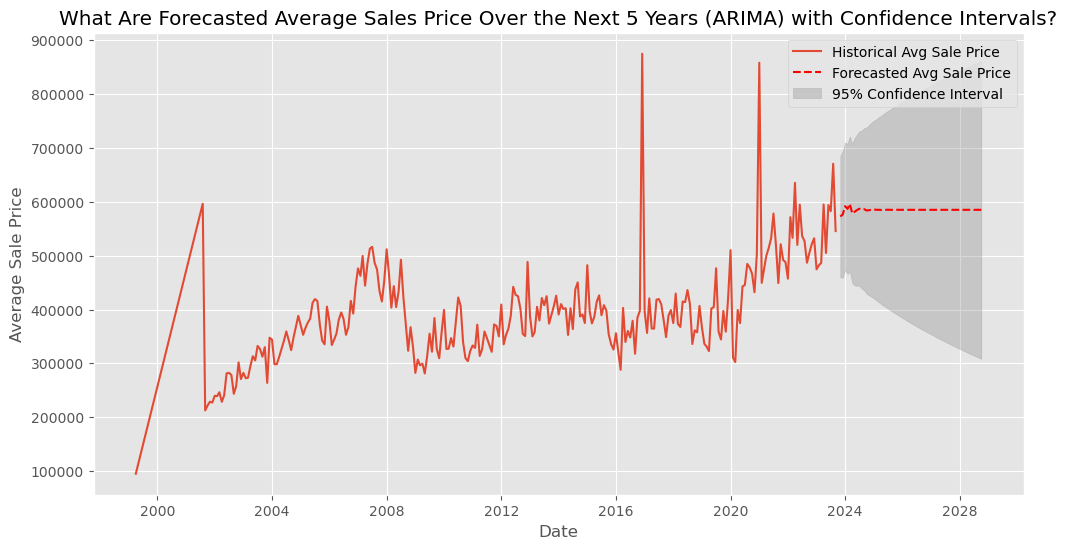

In [114]:
from statsmodels.tsa.arima.model import ARIMA

# ensure 'date_recorded' is in datetime format
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

# group by month and calculate the average sale amount per month
monthly_avg_price = df.groupby(df['date_recorded'].dt.to_period('M'))['sale_amount'].mean()

# convert period index to timestamp for plotting
monthly_avg_price.index = monthly_avg_price.index.to_timestamp()

# fit ARIMA model on the monthly average sale prices (adjust (p, d, q) if needed)
model = ARIMA(monthly_avg_price, order = (5, 1, 0))  # (p, d, q) parameters
fit = model.fit()

# forecast for the next 5 years (60 months)
forecast_obj = fit.get_forecast(steps = 60)  # 60 months = 5 years

# extract forecasted values and confidence intervals
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha = 0.05)  # 95% confidence interval

# create future date range for the forecasted period
forecast_dates = pd.date_range(start = monthly_avg_price.index[-1], periods = 61, freq = 'M')[1:]

# plot historical and forecasted values
plt.figure(figsize = (12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, label = "Historical Avg Sale Price")
plt.plot(forecast_dates, forecast, linestyle = 'dashed', color = 'red', label = "Forecasted Avg Sale Price")

# plot the confidence intervals
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color = 'gray', alpha = 0.3, label = '95% Confidence Interval')

# add labels and title
plt.xlabel("Date")
plt.ylabel("Average Sale Price")
plt.title("What Are Forecasted Average Sales Price Over the Next 5 Years (ARIMA) with Confidence Intervals?")

# display legend and grid
plt.legend()
plt.grid(True)

# show the plot
plt.show()

The ARIMA forecast includes a 95% confidence interval, meaning that there's a 95% chance the true future values will fall somewhere in the shaded gray area. However, a wider area does mean that there is more uncertainty in the forecast horizon.

**Question 4**: Which property sales are extreme outliers based on the sale amount?

In [118]:
from scipy.stats import zscore

# compute Z-scores for sale amount
df['sale_zscore'] = zscore(df['sale_amount'])

# set outlier threshold
threshold = 3

# identify outliers
outliers = df[df['sale_zscore'].abs() > threshold]

# adding all properties with Z-score > threshold
outlier_count = (df['sale_zscore'].abs() > threshold).sum()

# print the result
print(f"Number of properties with a Z-score above {threshold}: {outlier_count}")

# display top extreme sales
outliers.sort_values(by='sale_zscore', ascending=False).head(10)

Number of properties with a Z-score above 3: 5312


,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,Year,Date Recorded,Month,Month_Num,year,sale_zscore
0,220810,2022,2023-08-02,Greenwich,INDIAN FIELD ROAD 0499 & 0 & I,30927330,138830000,0,Residential,Single Family,2023,2023-08-02,August,8,2023,103
1,60428,2006,2007-03-06,Greenwich,100 W PUTNAM AVE,69421380,136700000,1,Not Listed,Not Listed,2007,2007-03-06,March,3,2007,101
2,170888,2017,2018-08-08,Hamden,0 HAMDEN HILLS DR,55931890,136500000,0,Not Listed,Not Listed,2018,2018-08-08,August,8,2018,101
3,13371,2013,2013-12-16,Stamford,101 WASHINGTON BOULEVARD,76228710,135000000,1,Not Listed,Not Listed,2013,2013-12-16,December,12,2013,100
4,2100880,2021,2022-02-03,Stamford,75 TRESSER BOULEVARD,79264280,131250000,1,Apartments,Not Listed,2022,2022-02-03,February,2,2022,97
5,130407,2013,2014-06-27,Westport,60 NYALA FARMS RD,78206200,130000000,1,Not Listed,Not Listed,2014,2014-06-27,June,6,2014,96
6,180120,2018,2018-11-26,Greenwich,100 WEST PUTNAM AVE,90343120,130000000,1,Not Listed,Not Listed,2018,2018-11-26,November,11,2018,96
7,160093,2016,2016-11-07,Greenwich,51 WEAVER ST,103207510,130000000,1,Not Listed,Not Listed,2016,2016-11-07,November,11,2016,96
8,13056,2013,2013-10-10,Stamford,429 WASHINGTON BOULEVARD,67984780,128430385,1,Not Listed,Not Listed,2013,2013-10-10,October,10,2013,95
10,181027,2018,2019-07-18,Danbury,15 ABBEY LANE / WOODLAND RD,63699800,124000000,1,Not Listed,Not Listed,2019,2019-07-18,July,7,2019,92



In this analysis, we are focusing on the Z-scores of various numerical features in our real estate dataset. The Z-score is a measure of how far a data point is from the mean, expressed in standard deviations. A Z-score of 0 means the data point is exactly at the mean, while positive or negative values indicate how many standard deviations away the point is from the meaes.


**Question 5**: How does average sale price relate to price volatility?

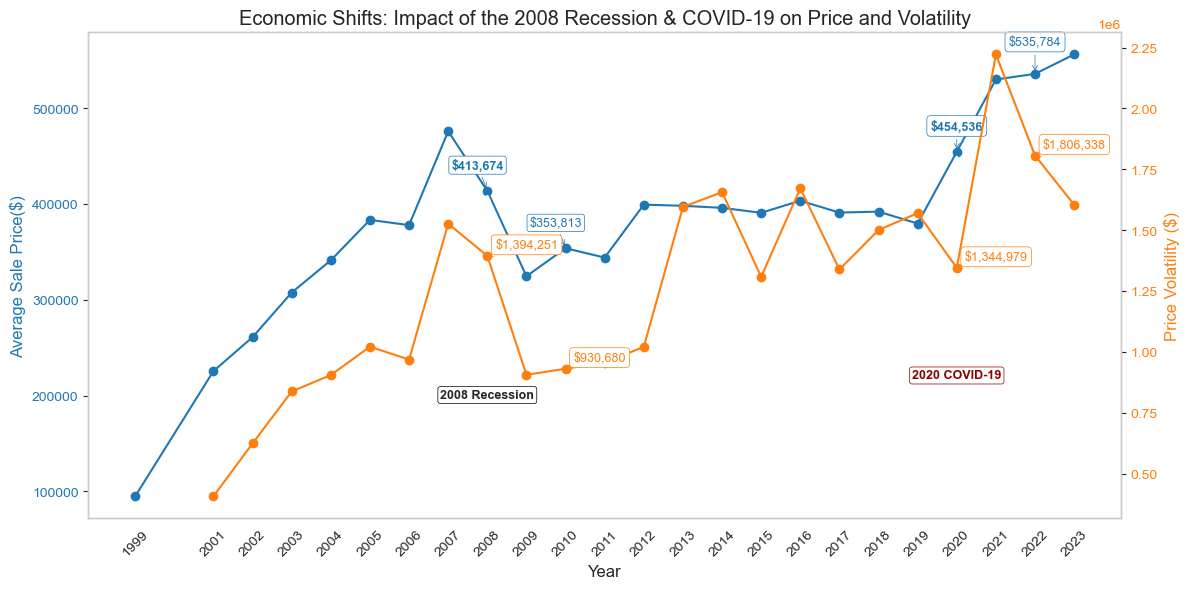

In [144]:
# convert date_recorded to datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# create year column for grouping
df['Year'] = df['Date Recorded'].dt.year

# calculate the yearly average sale price and price volatility (standard deviation)
yearly_stats = df.groupby('Year').agg(
    average_sale_price = ('sale_amount', 'mean'),
    price_volatility = ('sale_amount', 'std')
).reset_index()

# plot the data with dual axes
fig, ax1 = plt.subplots(figsize = (12, 6))

# plot Average Sale Price on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sale Price($)', color = 'tab:blue')
ax1.plot(yearly_stats['Year'], yearly_stats['average_sale_price'], color = 'tab:blue', marker = 'o', label = 'Average Sale Price')
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')

# show all years on x-axis
ax1.set_xticks(yearly_stats['Year'])
ax1.set_xticklabels(yearly_stats['Year'], rotation = 45)

# annotate 2008 recession
recession_year = 2008
recession_value = yearly_stats.loc[yearly_stats['Year'] == recession_year, 'average_sale_price'].values[0]

ax1.annotate('2008 Recession',
             xy = (recession_year, recession_value),
             xytext = (recession_year, recession_value * 0.5),
             arrowprops = dict(facecolor = 'black', arrowstyle = '->', lw = 1.5),
             fontsize = 9,
             fontweight = 'bold',
             ha = 'center',
             va = 'top',
             bbox = dict(boxstyle = 'round,pad=0.2', fc = 'white', ec = 'black'))

ax1.annotate(f"${recession_value:,.0f}",
             xy=(recession_year, recession_value),
             xytext=(recession_year - 0.25, recession_value + 20000),
             ha='center', va='bottom',
             fontsize=9, color='tab:blue',
             fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='tab:blue'),
             arrowprops=dict(arrowstyle='->', color='tab:blue'))

# annotate 2010
for year in [2010]:
    value = yearly_stats.loc[yearly_stats['Year'] == year, 'average_sale_price'].values[0]
    ax1.annotate(f"${value:,.0f}",
                 xy=(year, value),
                 xytext=(year - 0.25, value + 20000),
                 ha='center', va='bottom',
                 fontsize=9, color='tab:blue',
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='tab:blue'),
                 arrowprops=dict(arrowstyle='->', color='tab:blue'))

# annotate 2020 COVID
covid_year = 2020
covid_value = yearly_stats.loc[yearly_stats['Year'] == covid_year, 'average_sale_price'].values[0]

ax1.annotate('2020 COVID-19',
             xy = (covid_year, covid_value),
             xytext = (covid_year, covid_value * 0.5),
             arrowprops = dict(facecolor = 'darkred', arrowstyle = '->', lw = 1.5),
             fontsize = 9,
             fontweight = 'bold',
             ha = 'center',
             va = 'top',
             color = 'darkred',
             bbox = dict(boxstyle = 'round,pad=0.2', fc = 'white', ec = 'darkred'))

ax1.annotate(f"${covid_value:,.0f}",
             xy=(covid_year, covid_value),
             xytext=(covid_year, covid_value + 20000),
             ha='center', va='bottom',
             fontsize=9, color='tab:blue',
             fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='tab:blue'),
             arrowprops=dict(arrowstyle='->', color='tab:blue'))

# annotate 2022 values
for year in [2022]:
    value = yearly_stats.loc[yearly_stats['Year'] == year, 'average_sale_price'].values[0]
    ax1.annotate(f"${value:,.0f}",
                 xy=(year, value),
                 xytext=(year, value + 30000),
                 ha='center', va='baseline',
                 fontsize=9, color='tab:blue',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='tab:blue'),
                 arrowprops=dict(arrowstyle='->', color='tab:blue'))

# increase bottom margin so text isn't cut off
plt.subplots_adjust(bottom = 0.2)

# create second y-axis for Price Volatility
ax2 = ax1.twinx()
ax2.set_ylabel('Price Volatility ($)', color = 'tab:orange')
ax2.plot(yearly_stats['Year'], yearly_stats['price_volatility'], color = 'tab:orange', marker = 'o', label = 'Price Volatility')

# Annotate volatility values on the right y-axis for 2008, 2010, 2020, and 2022
for year in [2008, 2010, 2020, 2022]:
    vol_value = yearly_stats.loc[yearly_stats['Year'] == year, 'price_volatility'].values[0]
    ax2.annotate(f"${vol_value:,.0f}",
                 xy=(year, vol_value),
                 xytext=(year + 0.2, vol_value + 20000),  # slight nudge right and up
                 ha='left', va='bottom',
                 fontsize=9, color='tab:orange',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='tab:orange'),
                 arrowprops=dict(arrowstyle='->', color='tab:orange'))


ax2.tick_params(axis = 'y', labelcolor = 'tab:orange')
ax1.grid(False)
ax2.grid(False)

# title and Layout
plt.title('Economic Shifts: Impact of the 2008 Recession & COVID-19 on Price and Volatility')
plt.tight_layout()

# show plot
plt.show()

This chart compares the average sale price and price volatility (measured as standard deviation) of property sales over the years. The blue line represents the average sale price per year, while the orange line shows the price volatility. The dual-axis allows for a clear comparison between the two trends, helping us understand how price stability (volatility) may be related to the overall pricing trends over time.

**Question 6**: How does the Compound Annual Growth Rate (CAGR) of property prices in each town relate to the total sales volume in those towns?

Spearman correlation: -0.06


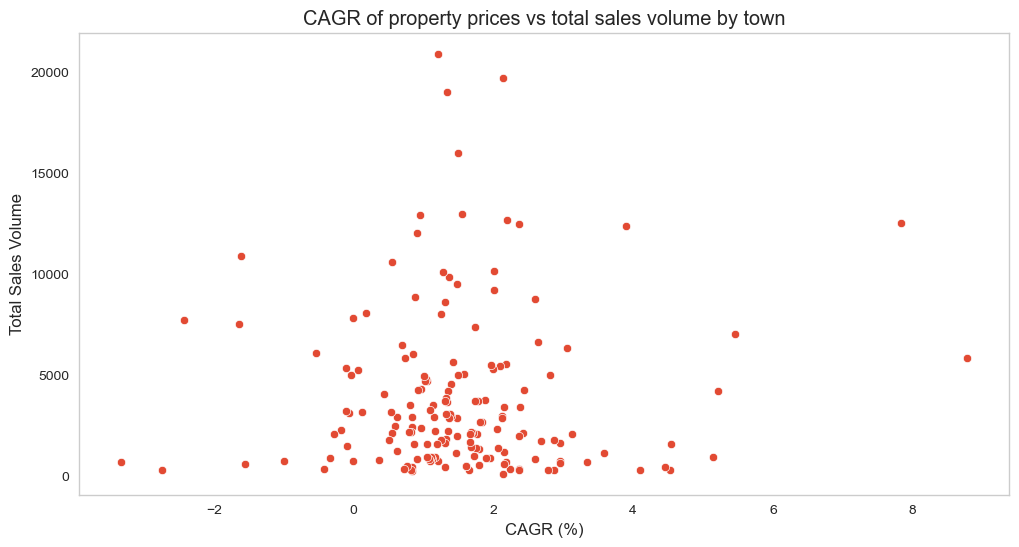

In [148]:
from sklearn.linear_model import LinearRegression

# ensure date column is in datetime format
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['year'] = df['date_recorded'].dt.year

# group data by year and calculate mean sale amount per town & property type
avg_price_trend = df.groupby(['year', 'town'])['sale_amount'].mean().unstack()

# fit linear regression to identify growth trends
trends = {}
for town in avg_price_trend.columns:
    valid_data = avg_price_trend[town].dropna()
    if len(valid_data) > 1:
        years = valid_data.index.values.reshape(-1, 1)
        prices = valid_data.values
        model = LinearRegression().fit(years, prices)
        trends[town] = model.coef_[0]  # slope is yearly price growth

# convert to DataFrame
trend_df = pd.DataFrame(trends.items(), columns = ['town', 'Annual Growth Rate'])
trend_df = trend_df.sort_values(by = 'Annual Growth Rate', ascending=False)

# CAGR calculation (Compound Annual Growth Rate)
def calculate_cagr(start, end, years):
    return ((end / start) ** (1 / years) - 1) * 100 if start > 0 else np.nan

cagr = {}
for town in avg_price_trend.columns:
    valid_data = avg_price_trend[town].dropna()
    if len(valid_data) > 1:
        start_price = valid_data.iloc[0]
        end_price = valid_data.iloc[-1]
        num_years = valid_data.shape[0]
        cagr[town] = calculate_cagr(start_price, end_price, num_years)

cagr_df = pd.DataFrame(cagr.items(), columns = ['town', 'CAGR (%)']).sort_values(by = 'CAGR (%)', ascending=False)

# calculate sales volume per town
town_sales_volume = df.groupby('town')['sale_amount'].count()

# merge with CAGR data
volume_vs_growth = pd.merge(cagr_df, town_sales_volume, on = 'town')

# scatter plot for sales growth vs volume
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'CAGR (%)', y = 'sale_amount', data = volume_vs_growth)
plt.xlabel('CAGR (%)')
plt.ylabel('Total Sales Volume')
plt.title('CAGR of property prices vs total sales volume by town')

# calculate Spearman's rank correlation
from scipy.stats import spearmanr
corr, _ = spearmanr(volume_vs_growth['CAGR (%)'], volume_vs_growth['sale_amount'])
print(f"Spearman correlation: {corr:.2f}")

# show plot
plt.grid()
plt.show()

This scatter plot visualizes the relationship between CAGR (Compound Annual Growth Rate) and town property volume. Each point represents a town, with its CAGR on the x-axis and property volume (total number of properties sold) on the y-axis. This plot helps identify whether towns with higher property sales volumes are also seeing greater growth in property prices over time.

**Question 7A**: What are the best performing months in the market? (Part 1)

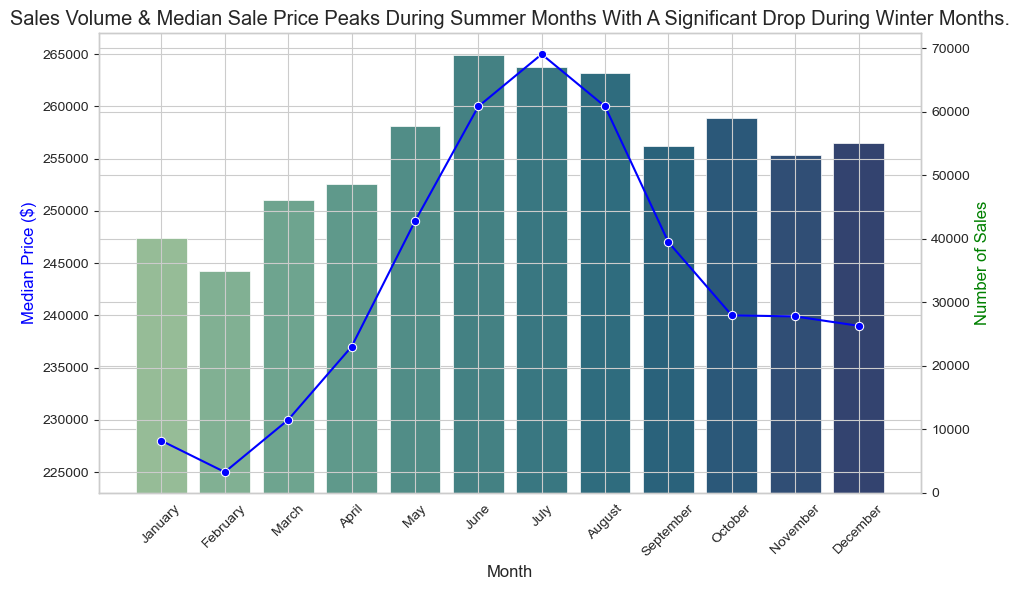

In [152]:
# convert 'date_recorded' to datetime format
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# extract month name and month number
df['Month'] = df['date_recorded'].dt.month_name()
df['Month_Num'] = df['date_recorded'].dt.month

# group by 'Month_Num' and 'Month', calculate median, mean, and count of 'sale_amount'
monthly_stats = df.groupby(['Month_Num', 'Month']).agg({
    'sale_amount': ['median', 'mean', 'count']
}).reset_index()

# flatten multi-level columns
monthly_stats.columns = ['Month_Num', 'Month', 'Median Price', 'Average Price', 'Sales Volume']

# sort by month number
monthly_stats = monthly_stats.sort_values('Month_Num')

# plot median price and sales volume on the same chart using dual y-axes
fig, ax1 = plt.subplots(figsize = (10, 6))

# create the secondary y-axis (ax2) for sales volume and plot the bar plot (background)
ax2 = ax1.twinx()
sns.barplot(data = monthly_stats, x = 'Month', y = 'Sales Volume', ax = ax2, palette = 'crest', zorder = 1)
ax2.set_ylabel('Number of Sales', color = 'green')

# plot median price on the primary y-axis (foreground)
sns.lineplot(data = monthly_stats, x = 'Month', y = 'Median Price', marker = 'o', ax = ax1, color = 'blue', zorder = 2)
ax1.set_ylabel('Median Price ($)', color = 'blue')
ax1.set_title('Sales Volume & Median Sale Price Peaks During Summer Months With A Significant Drop During Winter Months.')
ax1.set_xlabel('Month')

# bring line axis to front and make its background transparent
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

# rotate x-axis labels
ax1.set_xticks(range(len(monthly_stats)))
ax1.set_xticklabels(monthly_stats['Month'], rotation=45)

# adjust layout and show plot
plt.tight_layout()
plt.show()

This dual chart visualizes the median price over time(line graph) and the sales volume(bar graph). The plot helps identify the top months for both factors, which is key to know when investments could maximize, while also showing months where investments would be wise leading up to the peak months. 

**Question 7B**: What are the best performing months in the market? (Part 2)

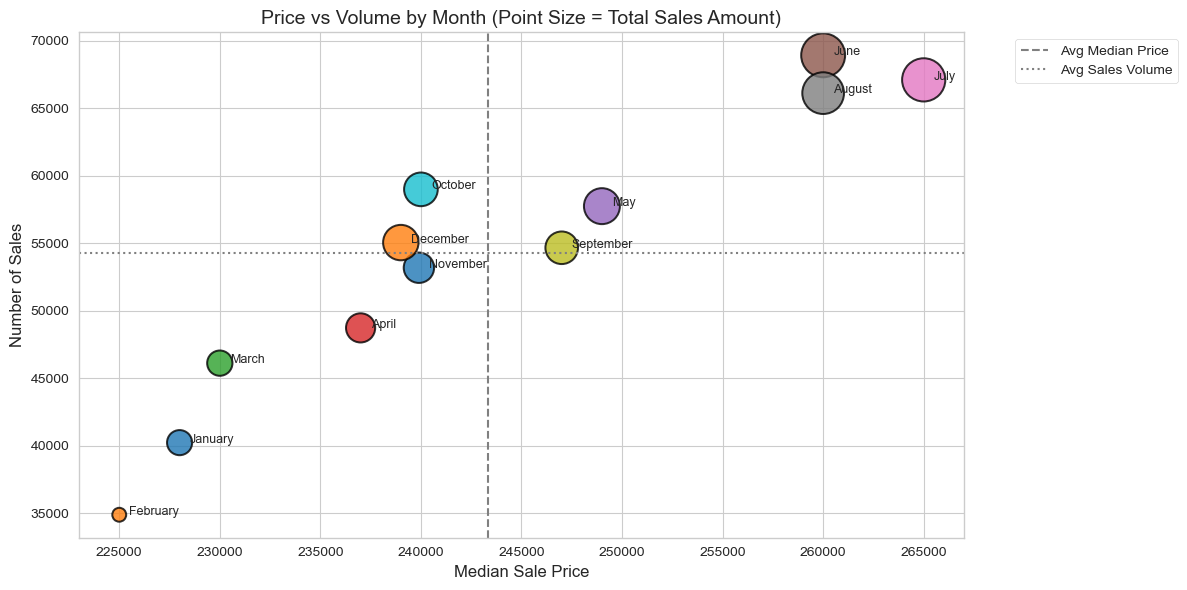

In [156]:
# ensure date column is datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# extract month name and number
df['Month'] = df['date_recorded'].dt.month_name()
df['Month_Num'] = df['date_recorded'].dt.month

# calculate monthly stats
monthly_stats = df.groupby(['Month_Num', 'Month']).agg({
    'sale_amount': ['median', 'count', 'sum']
}).reset_index()

# flatten column names
monthly_stats.columns = ['Month_Num', 'Month', 'Median Price', 'Sales Volume', 'Total Sales Amount']
monthly_stats = monthly_stats.sort_values('Month_Num')

# calculate benchmark averages
price_avg = monthly_stats['Median Price'].mean()
volume_avg = monthly_stats['Sales Volume'].mean()

# plot
plt.figure(figsize = (12, 6))
sns.set_style('whitegrid')

scatter = sns.scatterplot(
    data = monthly_stats,
    x = 'Median Price',
    y = 'Sales Volume',
    size = 'Total Sales Amount',
    hue = 'Month',
    sizes = (100, 1000),
    palette = 'tab10',
    alpha = 0.8,
    edgecolor = 'black',
    legend = False
)

# add average lines
plt.axvline(price_avg, color = 'gray', linestyle = '--', label = 'Avg Median Price')
plt.axhline(volume_avg, color = 'gray', linestyle = ':', label = 'Avg Sales Volume')

# annotate each point
for _, row in monthly_stats.iterrows():
    plt.text(
        row['Median Price'] + 500,
        row['Sales Volume'],
        row['Month'],
        fontsize = 9
    )

# final chart polish
plt.title('Price vs Volume by Month (Point Size = Total Sales Amount)', fontsize=14)
plt.xlabel('Median Sale Price')
plt.ylabel('Number of Sales')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

This visual feeds off the previous one, displaying essentially the same information. However, the chart is split into quadrants, with the top performing months in quadrant 1, and the bottom months in quadrant 3. Again, this visual further aids the data to present the most opportunistic months to invest. 

**Question 8**: What are the general best months to invest into properties?

    Month_Num      Month  Investment Score  Rank
0           2   February                 1     1
1           1    January                 1     2
2           3      March                 1     3
3           4      April                 1     4
4          12   December                 1     5
5          11   November                 0     6
6          10    October                 0     7
7           9  September                 0     8
8           5        May                 0     9
9           8     August                 0    10
10          6       June                 0    11
11          7       July                 0    12


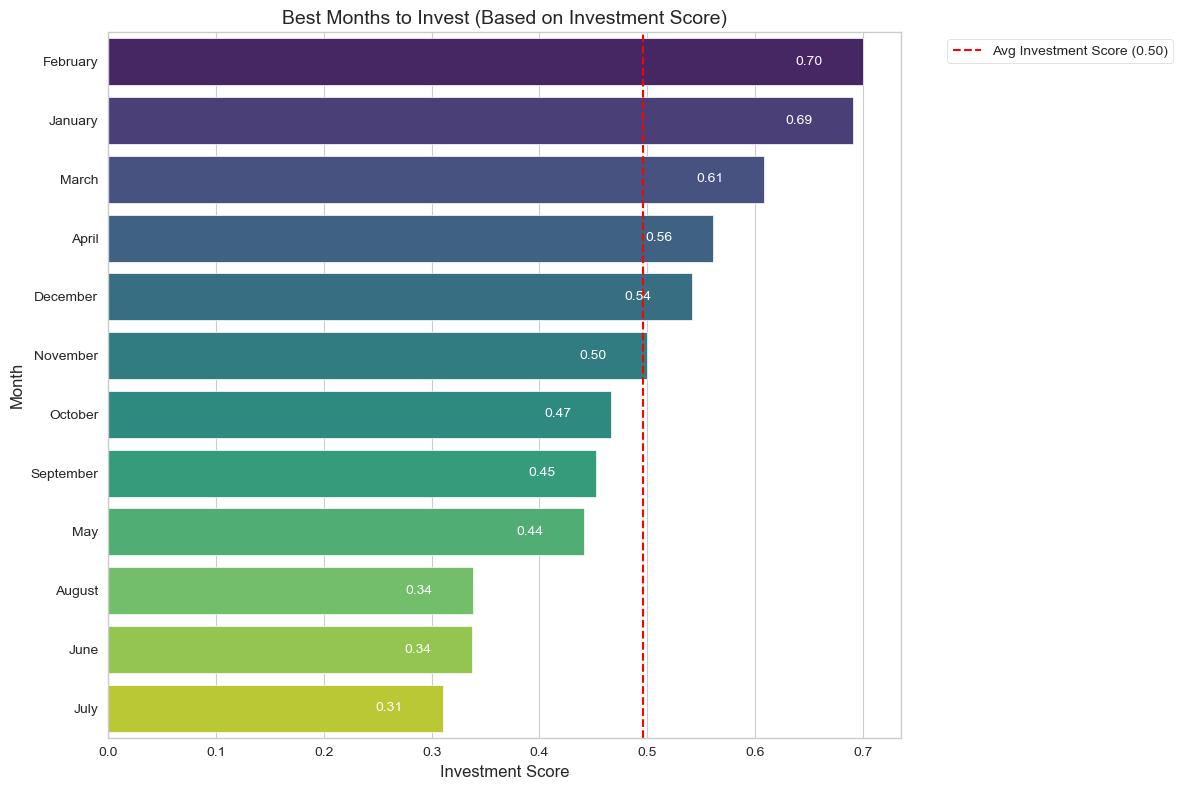

In [160]:
from sklearn.preprocessing import MinMaxScaler

# ensure 'Date Recorded' is datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# extract month info
df['Month'] = df['date_recorded'].dt.month_name()
df['Month_Num'] = df['date_recorded'].dt.month

# group by month and calculate stats
monthly_stats = df.groupby(['Month_Num', 'Month']).agg({
    'sale_amount': ['median', 'count', 'sum']
}).reset_index()

# flatten column names
monthly_stats.columns = ['Month_Num', 'Month', 'Median Price', 'Sales Volume', 'Total Sales Amount']
monthly_stats = monthly_stats.sort_values('Month_Num')

# normalize metrics using MinMaxScaler
scaler = MinMaxScaler()
monthly_stats_scaled = monthly_stats.copy()
monthly_stats_scaled[['Median Price (scaled)', 'Sales Volume (scaled)', 'Total Sales Amount (scaled)']] = scaler.fit_transform(
    monthly_stats[['Median Price', 'Sales Volume', 'Total Sales Amount']]
)

# reverse score for price and volume (lower is better)
monthly_stats_scaled['Price Score'] = 1 - monthly_stats_scaled['Median Price (scaled)']
monthly_stats_scaled['Volume Score'] = 1 - monthly_stats_scaled['Sales Volume (scaled)']
monthly_stats_scaled['Market Opportunity Score'] = monthly_stats_scaled['Total Sales Amount (scaled)']

# assign weights (adjustable as needed)
w_price = 0.3  # Lower price impact
w_volume = 0.4  # Increased weight for sales volume
w_market = 0.3  # Keep market opportunity constant

# calculate investment score
monthly_stats_scaled['Investment Score'] = (
    w_price * monthly_stats_scaled['Price Score'] +
    w_volume * monthly_stats_scaled['Volume Score'] +
    w_market * monthly_stats_scaled['Market Opportunity Score']
)

# rank months
monthly_ranked = monthly_stats_scaled[['Month_Num', 'Month', 'Investment Score']].sort_values('Investment Score', ascending = False)
monthly_ranked.reset_index(drop = True, inplace = True)
monthly_ranked['Rank'] = monthly_ranked.index + 1

# display ranked table
print(monthly_ranked)

# plot the investment score by month with enhancements
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')

# plot barplot of Investment Scores by Month
scatter = sns.barplot(
    data = monthly_ranked,
    x = 'Investment Score',
    y = 'Month',
    palette = 'viridis',
    order = monthly_ranked.sort_values('Investment Score', ascending = False)['Month']
)

# add average investment score line for context
average_score = monthly_ranked['Investment Score'].mean()
plt.axvline(average_score, color = 'red', linestyle = '--', label = f'Avg Investment Score ({average_score:.2f})')

# add data labels
for p in scatter.patches:
    scatter.annotate(f'{p.get_width():.2f}', 
                     (p.get_x() + p.get_width() - 0.05, p.get_y() + p.get_height() / 2),
                     ha = 'center', va = 'center', color = 'white', fontsize = 10)


# final chart polish
plt.title('Best Months to Invest (Based on Investment Score)', fontsize=14)
plt.xlabel('Investment Score')
plt.ylabel('Month')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

This chart displays the investment score across different months, helping identify the most promising months for property investment. The investment score is calculated by considering key factors such as price volatility, sales volume, and CAGR. By analyzing the score, investors can focus on months with higher potential returns, making it easier to time investments for better profitability.

**Question 9**: What are the top 10 towns based on Compound Annual Growth Rate?

           town  CAGR (%)
163     Windsor         9
56    Greenwich         8
13     Branford         5
93   New London         5
29     Columbia         5
155   Westbrook         5
20       Canaan         5
86       Morris         4
30     Cornwall         4
137   Stratford         4


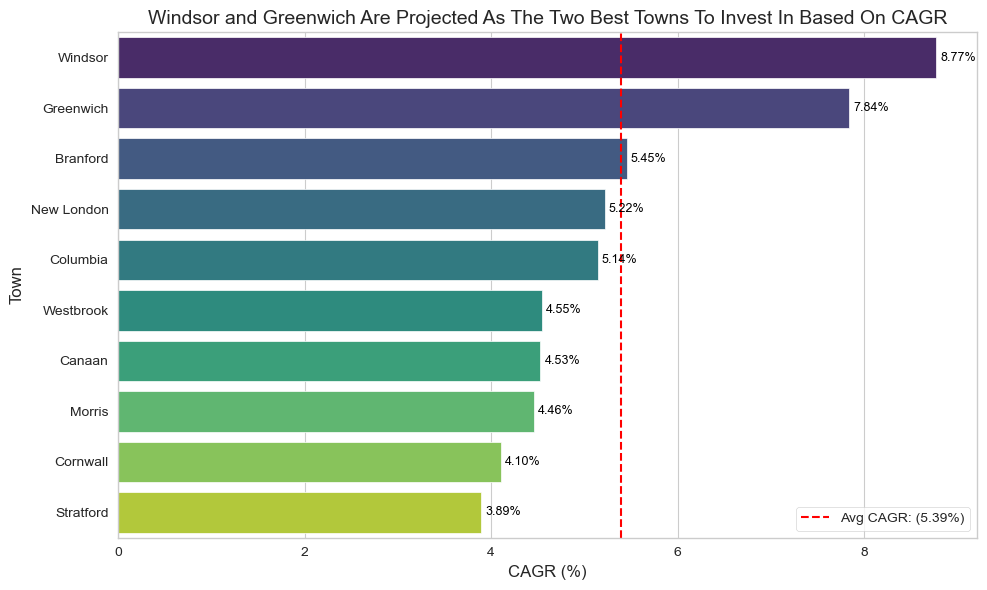

In [180]:
# ensure 'Date Recorded' is datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# group data by year and town and calculate sale amount (average price per year per town)
avg_price_trend = df.groupby(['year', 'town'])['sale_amount'].mean().unstack()

# fit linear regression to identify growth trends (Annual Growth Rate)
trends = {}
for town in avg_price_trend.columns:
    valid_data = avg_price_trend[town].dropna()
    if len(valid_data) > 1:
        years = valid_data.index.values.reshape(-1, 1)
        prices = valid_data.values
        model = LinearRegression().fit(years, prices)
        trends[town] = model.coef_[0]  # slope is yearly price growth

# convert trends to DataFrame
trend_df = pd.DataFrame(trends.items(), columns=['town', 'Annual Growth Rate'])
trend_df = trend_df.sort_values(by = 'Annual Growth Rate', ascending = False)

# calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start, end, years):
    return ((end / start) ** (1 / years) - 1) * 100 if start > 0 else np.nan

cagr = {}
for town in avg_price_trend.columns:
    valid_data = avg_price_trend[town].dropna()
    if len(valid_data) > 1:
        start_price = valid_data.iloc[0]
        end_price = valid_data.iloc[-1]
        num_years = valid_data.shape[0]
        cagr[town] = calculate_cagr(start_price, end_price, num_years)

# convert to DataFrame
cagr_df = pd.DataFrame(cagr.items(), columns = ['town', 'CAGR (%)'])

# sort by CAGR in descending order
top_10_towns_by_cagr = cagr_df.sort_values(by = 'CAGR (%)', ascending = False).head(10)

# display top 10 towns by CAGR
print(top_10_towns_by_cagr)

# find average CAGR from top 10 towns, plot on chart as red dashed line
average_cagr = top_10_towns_by_cagr['CAGR (%)'].mean()  # Calculate average from the top 10 towns

# plot the top 10 towns based on CAGR
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')

# plot barplot of CAGR for the top 10 towns
ax = sns.barplot(x = 'CAGR (%)', y = 'town', data = top_10_towns_by_cagr, palette = 'viridis')

# add average CAGR line
plt.axvline(average_cagr, color = 'red', linestyle = '--', label = f'Avg CAGR: ({average_cagr:.2f}%)')

# add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', color='black', fontsize=9, xytext=(3, 0), textcoords='offset points')
# add chart titles and labels
plt.title('Windsor and Greenwich Are Projected As The Two Best Towns To Invest In Based On CAGR', fontsize = 14)
plt.xlabel('CAGR (%)')
plt.ylabel('Town')
plt.legend(loc='lower right')

# adjust the layout to ensure everything fits
plt.tight_layout()
plt.show()

This chart highlights the top 10 towns based on their Compound Annual Growth Rate (CAGR), which measures the annual growth rate of property prices over a specific period. By ranking towns by their CAGR, this analysis helps identify which towns have experienced the highest rate of growth in property prices, offering insights into potentially lucrative areas for real estate investment.

**Question 10**: What are the top property types to invest in?

   property_type  Price Score  Volume Score  Market Opportunity Score  CAGR  \
0          Condo            1             1                         0     5   
2    Residential            0             1                         0     5   
5     Two Family            1             1                         0     0   
4   Three Family            1             1                         0    -0   
1    Four Family            1             1                         0    -0   
3  Single Family            0             0                         1    -0   

   Combined Score  
0               3  
2               3  
5               0  
4               0  
1               0  
3               0  


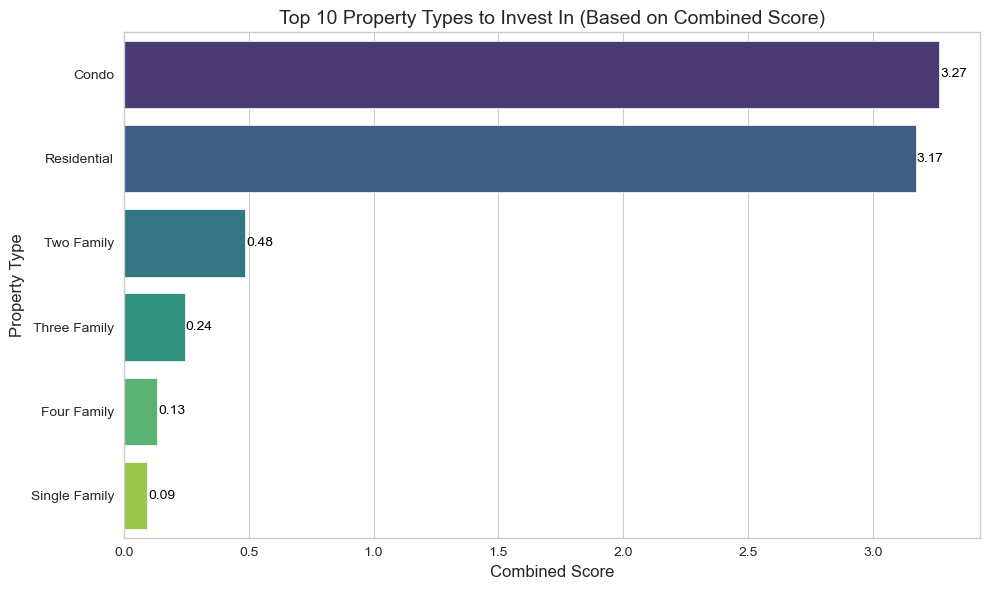

In [170]:
# ensure 'Date Recorded' is datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# group data by year and property type and calculate sale amount (average price per year per property type)
avg_price_trend = df.groupby(['year', 'property_type'])['sale_amount'].mean().unstack()

# fit linear regression to identify growth trends (Annual Growth Rate)
trends = {}
for property_type in avg_price_trend.columns:
    valid_data = avg_price_trend[property_type].dropna()
    if len(valid_data) > 1:
        years = valid_data.index.values.reshape(-1, 1)
        prices = valid_data.values
        model = LinearRegression().fit(years, prices)
        trends[property_type] = model.coef_[0]  # slope is yearly price growth

# convert trends to DataFrame
trend_df = pd.DataFrame(trends.items(), columns = ['property_type', 'Annual Growth Rate'])
trend_df = trend_df.sort_values(by = 'Annual Growth Rate', ascending = False)

# calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start, end, years):
    return ((end / start) ** (1 / years) - 1) * 100 if start > 0 else np.nan

cagr = {}
for property_type in avg_price_trend.columns:
    valid_data = avg_price_trend[property_type].dropna()
    if len(valid_data) > 1:
        start_price = valid_data.iloc[0]
        end_price = valid_data.iloc[-1]
        num_years = valid_data.shape[0]
        cagr[property_type] = calculate_cagr(start_price, end_price, num_years)

# convert to DataFrame
cagr_df = pd.DataFrame(cagr.items(), columns = ['property_type', 'CAGR (%)'])

# normalize metrics using MinMaxScaler for Investment Score
monthly_stats = df.groupby(['Month_Num', 'Month', 'property_type']).agg({
    'sale_amount': ['median', 'count', 'sum']
}).reset_index()

monthly_stats.columns = ['Month_Num', 'Month', 'property_type', 'Median Price', 'Sales Volume', 'Total Sales Amount']
monthly_stats = monthly_stats.sort_values(['property_type', 'Month_Num'])

# normalize the metrics using MinMaxScaler
scaler = MinMaxScaler()
monthly_stats_scaled = monthly_stats.copy()
monthly_stats_scaled[['Median Price (scaled)', 'Sales Volume (scaled)', 'Total Sales Amount (scaled)']] = scaler.fit_transform(
    monthly_stats[['Median Price', 'Sales Volume', 'Total Sales Amount']]
)

# reverse score for price and volume (lower is better)
monthly_stats_scaled['Price Score'] = 1 - monthly_stats_scaled['Median Price (scaled)']
monthly_stats_scaled['Volume Score'] = 1 - monthly_stats_scaled['Sales Volume (scaled)']
monthly_stats_scaled['Market Opportunity Score'] = monthly_stats_scaled['Total Sales Amount (scaled)']

# calculate Investment Score for each property type (average per property type)
investment_scores = monthly_stats_scaled.groupby('property_type').agg({
    'Price Score': 'mean',
    'Volume Score': 'mean',
    'Market Opportunity Score': 'mean'
}).reset_index()

# assign weights (adjustable as needed)
w_cagr = 0.6  # weight for CAGR
w_investment_score = 0.4  # weight for Investment Score

# combine the two scores 
combined_score = (w_cagr * cagr_df.set_index('property_type')['CAGR (%)'].reindex(investment_scores['property_type']).values) + \
                 (w_investment_score * investment_scores['Price Score'].values)

# add combined score to the dataframe
investment_scores['CAGR'] = cagr_df.set_index('property_type')['CAGR (%)'].reindex(investment_scores['property_type']).values
investment_scores['Combined Score'] = combined_score

# rank property types by combined score
top_10_property_types_to_invest = investment_scores.sort_values(by = 'Combined Score', ascending = False).head(10)

# display the top 10 property types
print(top_10_property_types_to_invest)

# plot the top 10 property types based on the combined score
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')

# plot barplot of Combined Score for the top 10 property types
ax = sns.barplot(x = 'Combined Score', y = 'property_type', data = top_10_property_types_to_invest, palette = 'viridis')

# add data labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center', color = 'black', fontsize = 10)

# add chart titles and labels
plt.title('Top 10 Property Types to Invest In (Based on Combined Score)', fontsize = 14)
plt.xlabel('Combined Score')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()

This chart highlights the top 10 property types based on their Compound Annual Growth Rate (CAGR), which measures the annual growth rate of property prices over a specific period. By ranking property types by their CAGR, this analysis helps identify which types have experienced the highest rate of growth in property prices, offering insights into potentially lucrative areas for real estate investment.

**Question 11**: What are the top residential types to invest in?

  residential_type  Price Score  Volume Score  Market Opportunity Score  CAGR  \
0            Condo            1             1                         0     7   
1      Four Family            1             1                         0     2   
3     Three Family            1             1                         0     2   
4       Two Family            1             1                         0     1   
2    Single Family            0             0                         1     1   

   Combined Score  
0               4  
1               1  
3               1  
4               1  
2               1  


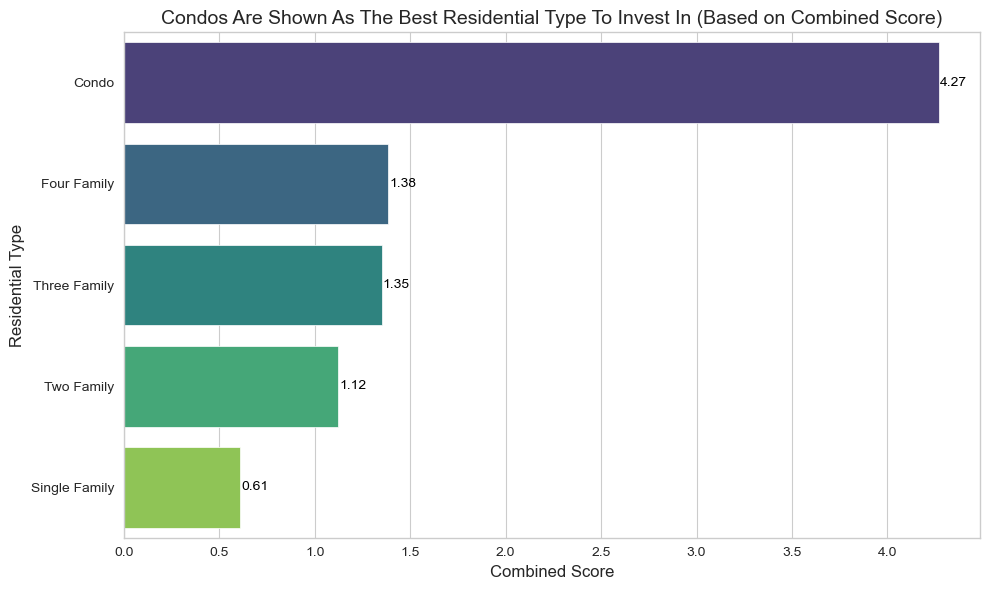

In [174]:
# ensure 'Date Recorded' is datetime
df['Date Recorded'] = pd.to_datetime(df['date_recorded'])

# remove 'Not Listed' property types
df = df[df['residential_type'] != 'Not Listed']

# extract year from date recorded field
df['year'] = df['Date Recorded'].dt.year

# group data by year and property type and calculate sale amount (average price per year per property type)
avg_price_trend = df.groupby(['year', 'residential_type'])['sale_amount'].mean().unstack()

# fit linear regression to identify growth trends (Annual Growth Rate)
trends = {}
for residential_type in avg_price_trend.columns:
    valid_data = avg_price_trend[residential_type].dropna()
    if len(valid_data) > 1:
        years = valid_data.index.values.reshape(-1, 1)
        prices = valid_data.values
        model = LinearRegression().fit(years, prices)
        trends[residential_type] = model.coef_[0]  # slope is yearly price growth

# convert trends to DataFrame
trend_df = pd.DataFrame(trends.items(), columns=['residential_type', 'Annual Growth Rate'])
trend_df = trend_df.sort_values(by='Annual Growth Rate', ascending=False)

# calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start, end, years):
    return ((end / start) ** (1 / years) - 1) * 100 if start > 0 else np.nan

cagr = {}
for residential_type in avg_price_trend.columns:
    valid_data = avg_price_trend[residential_type].dropna()
    if len(valid_data) > 1:
        start_price = valid_data.iloc[0]
        end_price = valid_data.iloc[-1]
        num_years = valid_data.shape[0]
        cagr[residential_type] = calculate_cagr(start_price, end_price, num_years)

# convert to DataFrame
cagr_df = pd.DataFrame(cagr.items(), columns = ['residential_type', 'CAGR (%)'])

# normalize metrics using MinMaxScaler for Investment Score
monthly_stats = df.groupby(['Month_Num', 'Month', 'residential_type']).agg({
    'sale_amount': ['median', 'count', 'sum']
}).reset_index()

monthly_stats.columns = ['Month_Num', 'Month', 'residential_type', 'Median Price', 'Sales Volume', 'Total Sales Amount']
monthly_stats = monthly_stats.sort_values(['residential_type', 'Month_Num'])

# normalize the metrics using MinMaxScaler
scaler = MinMaxScaler()
monthly_stats_scaled = monthly_stats.copy()
monthly_stats_scaled[['Median Price (scaled)', 'Sales Volume (scaled)', 'Total Sales Amount (scaled)']] = scaler.fit_transform(
    monthly_stats[['Median Price', 'Sales Volume', 'Total Sales Amount']]
)

# reverse score for price and volume (lower is better)
monthly_stats_scaled['Price Score'] = 1 - monthly_stats_scaled['Median Price (scaled)']
monthly_stats_scaled['Volume Score'] = 1 - monthly_stats_scaled['Sales Volume (scaled)']
monthly_stats_scaled['Market Opportunity Score'] = monthly_stats_scaled['Total Sales Amount (scaled)']

# calculate Investment Score for each property type (average per property type)
investment_scores = monthly_stats_scaled.groupby('residential_type').agg({
    'Price Score': 'mean',
    'Volume Score': 'mean',
    'Market Opportunity Score': 'mean'
}).reset_index()

# assign weights (adjustable as needed)
w_cagr = 0.6  # weight for CAGR
w_investment_score = 0.4  # weight for Investment Score

# combine the two scores
combined_score = (w_cagr * cagr_df.set_index('residential_type')['CAGR (%)'].reindex(investment_scores['residential_type']).values) + \
                 (w_investment_score * investment_scores['Price Score'].values)

# add combined score to the dataframe
investment_scores['CAGR'] = cagr_df.set_index('residential_type')['CAGR (%)'].reindex(investment_scores['residential_type']).values
investment_scores['Combined Score'] = combined_score

# rank property types by combined score
top_10_property_types_to_invest = investment_scores.sort_values(by='Combined Score', ascending = False).head()

# display the top 10 property types
print(top_10_property_types_to_invest)

# plot the top 10 property types based on the combined score
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')

# plot barplot of Combined Score for the top 10 property types
ax = sns.barplot(x = 'Combined Score', y = 'residential_type', data = top_10_property_types_to_invest, palette = 'viridis')

# add data labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center', color = 'black', fontsize = 10)

# add chart titles and labels
plt.title('Condos Are Shown As The Best Residential Type To Invest In (Based on Combined Score)', fontsize = 14)
plt.xlabel('Combined Score')
plt.ylabel('Residential Type')
plt.tight_layout()
plt.show()

This chart highlights the top 10 residential types based on their Compound Annual Growth Rate (CAGR), which measures the annual growth rate of property prices over a specific period. By ranking residential types by their CAGR, this analysis helps identify which types have experienced the highest rate of growth in property prices, offering insights into potentially lucrative areas for real estate investment.